# BT2101 Individual HW 2: Predict Customer Churn

## 1. Background Information


This data set provides info to help you predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

A telecommunications company is concerned about the number of customers leaving their landline business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.

The data set includes information about:

* Customers who left within the last month – the column is called Churn

* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* Demographic info about customers – gender, age range, and if they have partners and dependents



In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)
%matplotlib inline

## 2. Exploratory Data Analysis
* 2.1. Data Cleaning
* 2.2. Data Visualization 

In [231]:
churn_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [232]:
churn_data.shape

(7043, 21)

In [233]:
#Find out basic information of dataset
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## 2.1 Data Cleaning

* Checking and handling missing values

In [234]:
missing_values = churn_data.isna().sum()
missing_values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Observation:
There is no missing values. Next we check for presence of white spaces/empty strings in the data set.

In [235]:
#Check for empty strings
for column in churn_data:
    if(type(churn_data[column][0]) == str):
        emptyspaces_count = len(churn_data[churn_data[column] == " "])

        print("{0}: {1}".format(column, emptyspaces_count))

customerID: 0
gender: 0
Partner: 0
Dependents: 0
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
TotalCharges: 11
Churn: 0


In [236]:
#Examine the missing datapoints
churn_data[churn_data["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### Observation:
Total charges have 11 rows with empty strings, upon closer observation, we see that their tenure are all zero which signify that they may not have made any payment to the company explaining the loss of data. As the reason is unknown, I would remove this set of data for consistency.

In [237]:
#Drop the data sets with empty strings
churn_data["TotalCharges"] = churn_data["TotalCharges"].replace(" ", np.nan)
churn_data.dropna(inplace=True)
churn_data = churn_data.reset_index(drop=True)
churn_data["TotalCharges"] = churn_data["TotalCharges"].astype(float)

In [238]:
#Check that data is properly removed
churn_data.shape

(7032, 21)

## 2.2 Data Visualization

Next we perform a series of data visualization to better understand the data:

* 2.2.1 Overall Customer Churn Rate
* 2.2.2 Correlation between features
* 2.2.3 Customer Churn Rate of Categorical features
* 2.2.4 Customer Churn Rate of Numerical features


### 2.2.1 Overall Customer Churn Rate

We first try to find out what is the number and percentage of customers that left the telco company in the previous month.

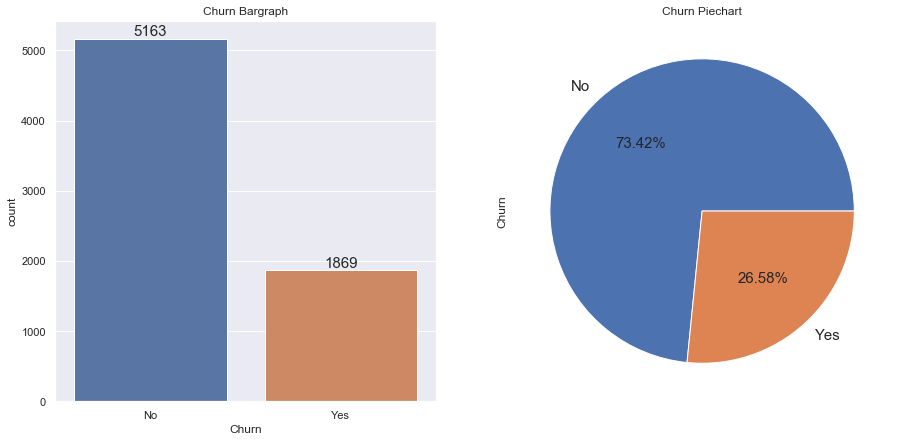

In [239]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
plt.subplot(121)
ax = sns.countplot(x="Churn", data=churn_data)

for i,j in enumerate(churn_data["Churn"].value_counts().values) : 
    ax.annotate(str(j),(i, j), ha='center', va='bottom',fontsize = 15)

    
plt.title('Churn Bargraph')

plt.subplot(122)
# plt.figure(figsize=(7,7))
churn_data["Churn"].value_counts().plot.pie(autopct = "%.2f%%", fontsize = 15)
plt.title("Churn Piechart")
plt.show()

# churn_data["Churn"].value_counts()

#### Observation:

In the previous month:

* Customers that left: 1869(26.58%)
* Customers that stayed: 5163(73.42%)

## 2.2.2 Correlation between features

We shall plot a heatmap to spot for any correlation between features

### Data Preprocessing for HeatMap

In [240]:
import copy 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

churn_heatMap = copy.deepcopy(churn_data)

#Categorical variables with more than 3 unique data
cat_var3 = []

#Categorical variables with more than 2 unique data
cat_var2 = []

#Continuous Variables
con_var = []

for i in churn_heatMap.columns[1:21]:
    if len(churn_heatMap[i].unique()) >= 3 and type(churn_heatMap[i][0]) == str:
        cat_var3.append(i)
    elif len(churn_heatMap[i].unique()) == 2:
        cat_var2.append(i)
    else:
        con_var.append(i)
        
#Create Dummy variables for Categorical variables with more than 3 unique data
churn_heatMap = pd.get_dummies(data = churn_heatMap,columns = cat_var3)
    
#Transform Categorical binary variables first
le = LabelEncoder()
for i in cat_var2:
    churn_heatMap[i] = le.fit_transform(churn_heatMap[i])
 
# Standardize features using min-max method
scaler = MinMaxScaler()
churn_heatMap[con_var] = scaler.fit_transform(churn_heatMap[con_var])

#churn_model.columns
churn_heatMap = churn_heatMap.drop(['customerID'], axis=1)
churn_heatMap.shape

(7032, 41)

In [241]:
cor_matrix = churn_heatMap.corr()
cor_array  = np.array(cor_matrix)
cor_var = list(churn_heatMap.columns)
data = [go.Heatmap(z=cor_array,x=cor_var,y=cor_var,colorscale='Greys')]
layout = go.Layout(
    title = "Correlation between features",
    autosize=False,
    width=850,
    height=800,
    margin=go.layout.Margin(
        l=200,
        r=0,
        b=200,
        t=30,
        pad=4
    ),
        yaxis = dict(tickfont = dict(size = 10)),
        xaxis = dict(tickfont = dict(size = 10))
)


fig = go.Figure(data,layout)
py.iplot(fig)

### Observation
We see high correlation = 1 between the extra internet and streaming services. Both No and No Internet Service or No Phone Service is the same. Therefore, we can convert this variables into binary features to reduce the number of redundant features.

### Converting Data to Binary

In [242]:
churn_data['MultipleLines'] = churn_data['MultipleLines'].map(lambda x:'No' if x in ['No phone service','No'] else "Yes")

churn_data['OnlineSecurity'] = churn_data['OnlineSecurity'].map(lambda x:'No' if x in ['No internet service','No'] else "Yes")

churn_data['OnlineBackup'] = churn_data['OnlineBackup'].map(lambda x:'No' if x in ['No internet service','No'] else "Yes")

churn_data['DeviceProtection'] = churn_data['DeviceProtection'].map(lambda x:'No' if x in ['No internet service','No'] else "Yes")

churn_data['TechSupport'] = churn_data['TechSupport'].map(lambda x:'No' if x in ['No internet service','No'] else "Yes")

churn_data['StreamingTV'] = churn_data['StreamingTV'].map(lambda x:'No' if x in ['No internet service','No'] else "Yes")

churn_data['StreamingMovies'] = churn_data['StreamingMovies'].map(lambda x:'No' if x in ['No internet service','No'] else "Yes")


### 2.2.2 Customer Churn Rate of Categorical Features

Next, we observe the Churn rate in each of the Categorical Features. There are a total of 16 Categorical Features: `Gender`, `Senior Citizen`, `Partner`, `Dependents`, `Phone Service`, `Multiple Lines`, `Internet Service`, `Online service`, `Online backup`, `Device protection`, `Tech support`, `Streaming tv`, `Streaming movies`, `Contract`, `Paperless billing` and `Payment method`.

### 2.2.2.1 Gender

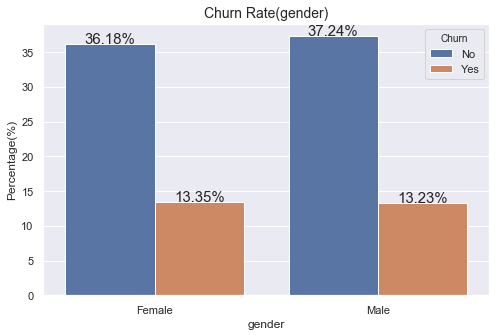

In [243]:
def barchart(variable):
    plt.figure(figsize=(8,5))
    ax = sns.barplot(x=variable, y="tenure",hue="Churn", data=churn_data, estimator=lambda x: len(x) / len(churn_data) * 100)
    ax.set(ylabel="Percentage(%)")
    ax.set_title("Churn Rate" + "(" + variable + ")",fontsize = 14)
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height() + "%", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=15, xytext=(0, 5),textcoords='offset points')  
    plt.show()
    
barchart("gender")

#### Observation:
The dataset generally contains equal percentage of males and females with equal churn rates.

### 2.2.2.2 Senior Citizen

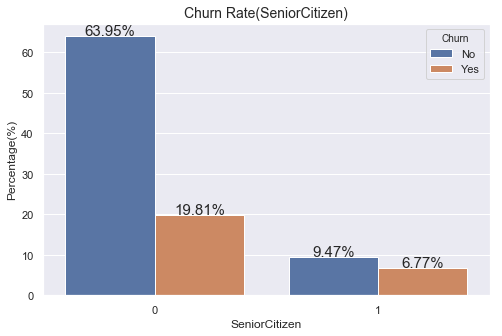

In [244]:
barchart("SeniorCitizen")

#### Observation:
There are more non senior citizens than senior citizen and the churn rate of the non senior citizen are lesser than those of the senior citizen. It seems that a larger percentage of senior citizen are contributing to the churn rate.

### 2.2.2.3 Partner and Dependents

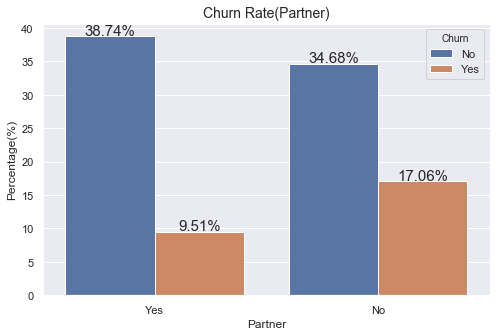

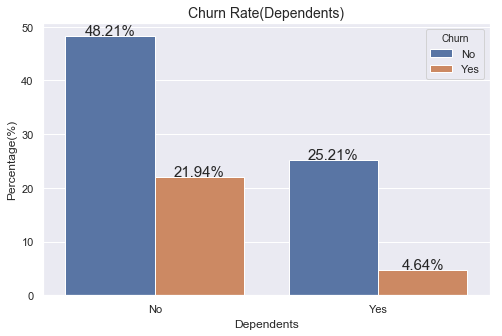

In [245]:
barchart("Partner")
barchart("Dependents")

#### Observation:
There are slightly more customers with partners in the dataset and we can see that Customers with no partner have a higher churn rate. There are more customers with no dependents and these customers with no dependents are also observed to have a higher churn rate.

### 2.2.2.4 Phone Service/Multiple Lines

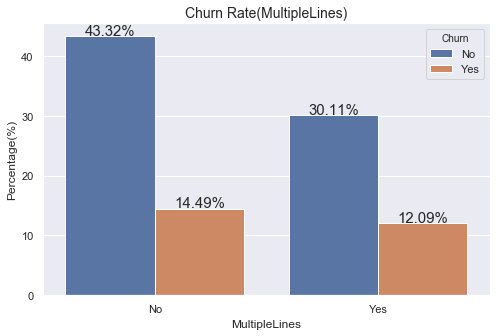

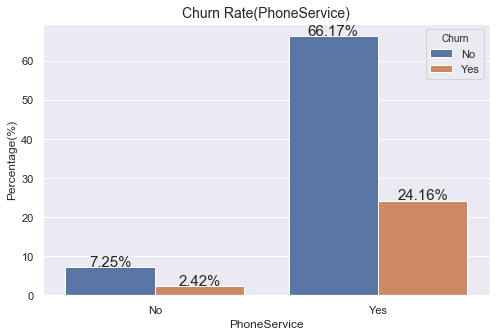

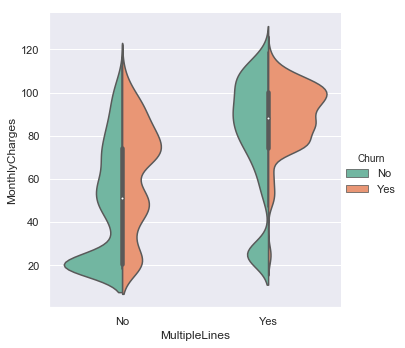

In [246]:
barchart("MultipleLines")
barchart("PhoneService")
sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin", split=True, palette="Set2", data=churn_data)
plt.show()

#### Observation
There are very little customers with no phone service in the data set and there is slightly more customers with no multiple lines than multiple lines. Customers with multiple lines are observed to have a higher percentage of churn rate.
By examining the violin plot we can observe that, having multiple lines costs more in general and customers who are churning are those that are paying a higher price.

### 2.2.2.5 Internet Service

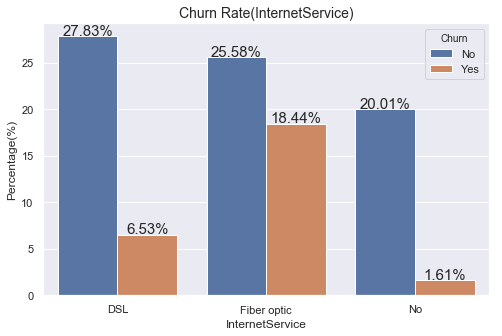

In [247]:
barchart("InternetService")

#### Observation:
Large percentage of customers have fiber optic internet service, followed by DSL and no internet service. Amount the 3 category, Customers with Fiber optic have the highest churn rate. This could suggest that either the telco have bad fiber optic service or it may be expensive. Suggesting a possible correlation between monthly charges and internet services.

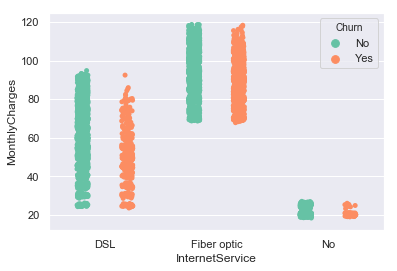

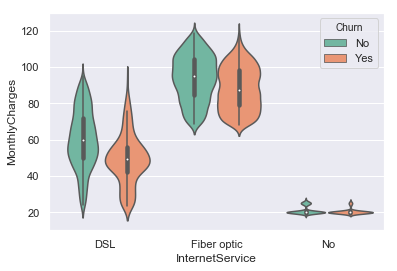

In [248]:
sns.stripplot(x="InternetService",y="MonthlyCharges",data=churn_data,jitter=True,hue="Churn",dodge=True,palette="Set2")
plt.show()
sns.violinplot(x="InternetService",y="MonthlyCharges",data=churn_data,hue="Churn",palette="Set2")
plt.show()

#### Observation:
From the strip plot and violin plot we can observe that there is a coorelation between monthly charges and the type of internet service. Fiber optics tend to have higher charges as it provides faster internet speed and the higher charges may be a contributing factor to the churn rate. However a special case to note is that for DSL customers that churn tend to pay less than customers that don't. 

### 2.2.2.6 Telco Services

* Online Security
* Online Backup
* Device Protection
* Tech Support
* Streaming TV
* Streaming Movies

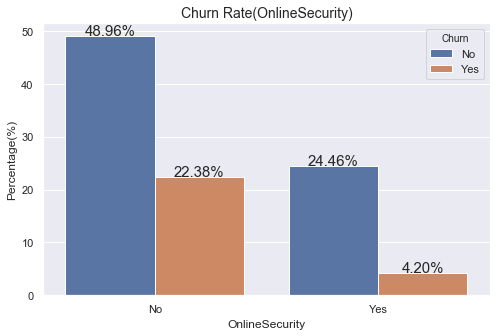

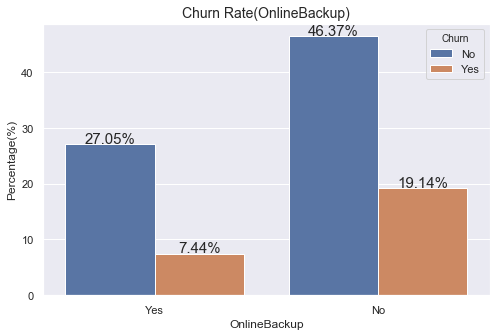

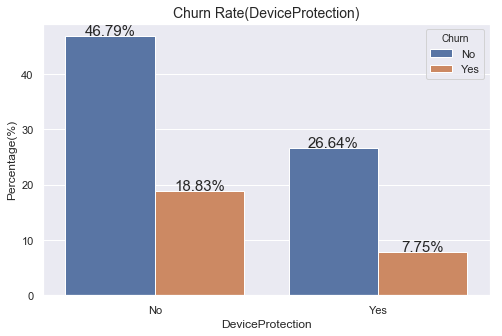

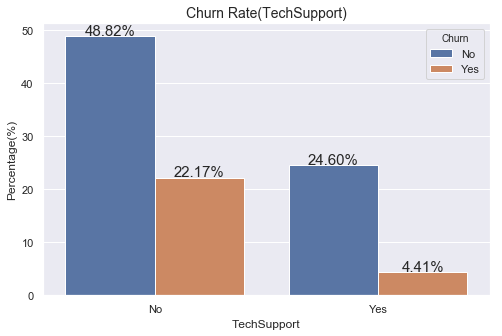

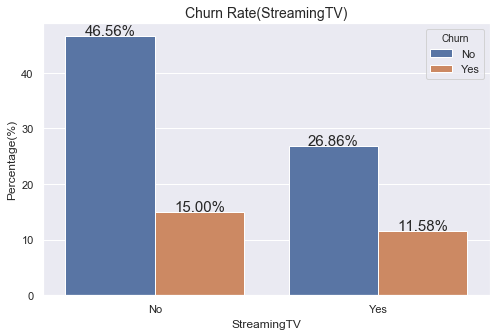

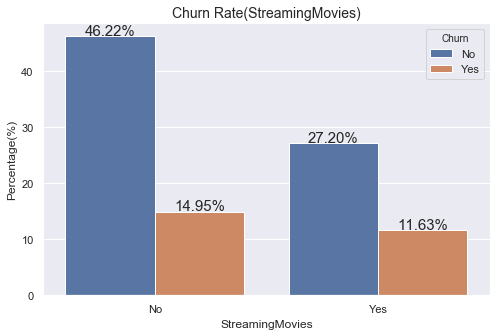

In [249]:
barchart("OnlineSecurity")
barchart("OnlineBackup")
barchart("DeviceProtection")
barchart("TechSupport")
barchart("StreamingTV")
barchart("StreamingMovies")

#### General Observation:
Generally, customers with no additional internet services seems to have a higher churn rate but customers with streaming services have a higher churn rate. This may suggest an issue with the streaming services provided by the telco company or that it is just expensive.

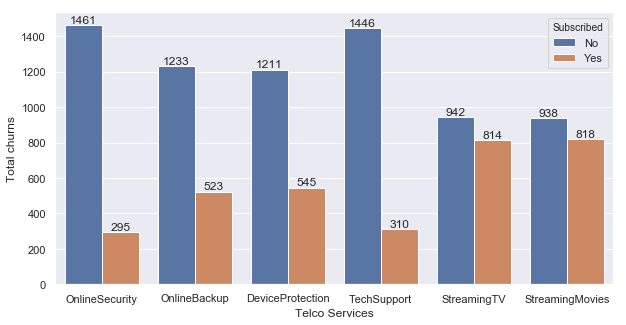

In [250]:
service_set = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
plt.figure(figsize=(10,5))
churn_plot = churn_data[(churn_data['InternetService'] != "No") & (churn_data['Churn'] == "Yes")]
churn_plot = pd.melt(churn_plot[service_set]).rename({'value':'Subscribed'}, axis=1)
ax = sns.countplot(x='variable', hue='Subscribed',data=churn_plot, hue_order=['No', 'Yes'])
ax.set(xlabel='Telco Services', ylabel='Total churns')
for p in ax.patches:
        ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, xytext=(0, 5),textcoords='offset points')  
plt.show()

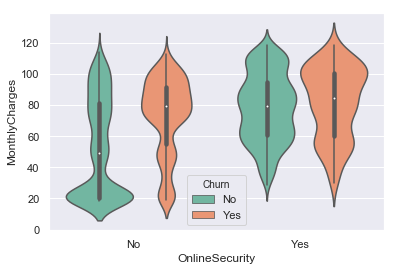

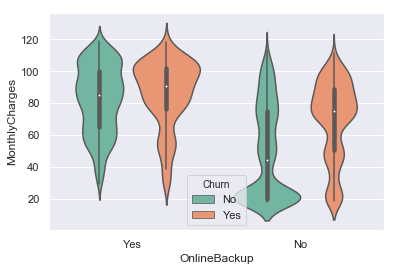

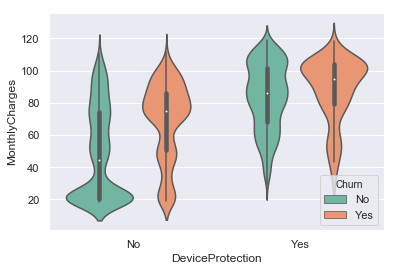

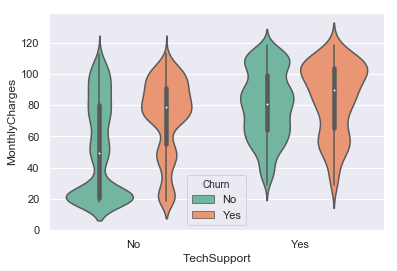

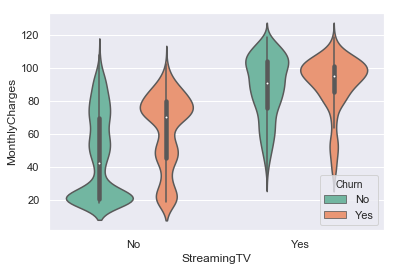

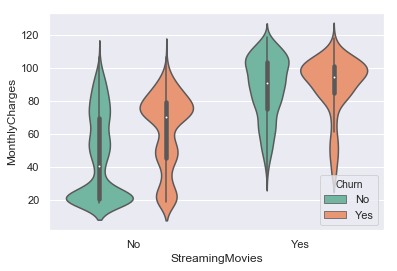

In [251]:
for i in service_set:
    sns.violinplot(x=i,y="MonthlyCharges",data=churn_data,hue="Churn",palette="Set2")
    plt.show()

#### More indepth Observation
From the violin plots, we can see a higher proportion of churn rate as the monthly charges increases whether the customers subscribed to extra services or not. Therefore, we can infer that cost/charges is an important factor towards determining the churn rate.

### 2.2.2.7 Contract

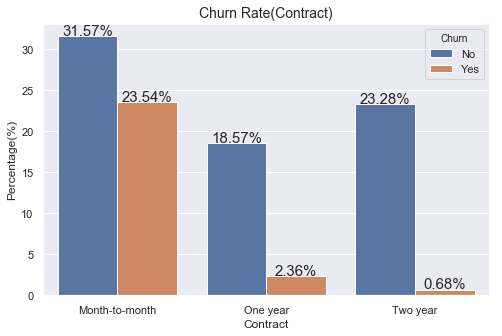

<Figure size 576x360 with 0 Axes>

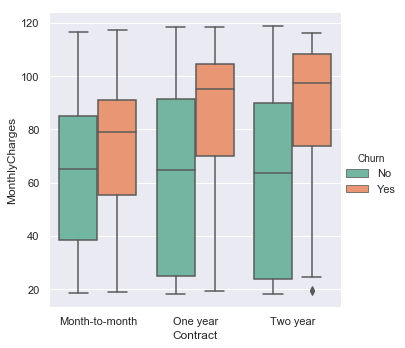

In [252]:
barchart("Contract")
plt.figure(figsize=(8,5))
sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=churn_data,palette="Set2")
plt.show()

#### Observation
Customers with month to month contracts seem to have the highest churn rate, this may be because it is easier to switch to another telco without incurring penalties unlike the other longer contracts.
From the boxplot, we again observe here that those that churn normally pay a higher price.

### 2.2.2.8 Paperless Billing & Payment Method

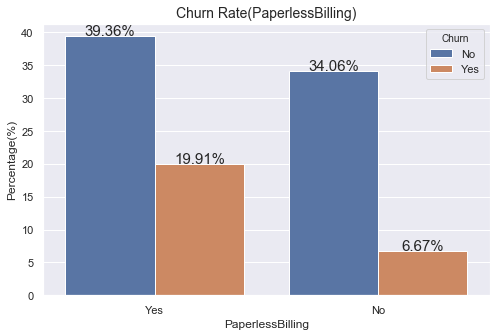

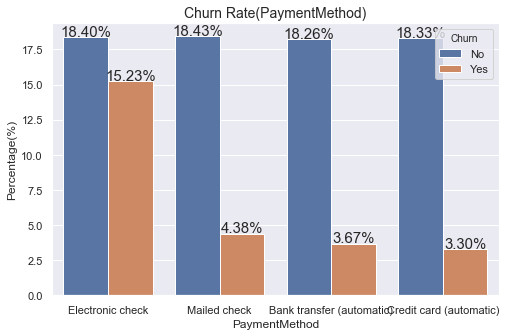

In [253]:
barchart("PaperlessBilling")
barchart("PaymentMethod")

#### Observation
Customers with paperless billing(online billing) has a higher churn rate in general. A slightly higher proportion of customers pay through electronic check and customers paying through this method has the highest churn rate compared to the other payment methods.

### 2.2.3 Customer Churn Rate of Numerical Features
Next, we observe the relationship between Churn rate and the Continuous Features which include: `tenure`, `Monthly Charges` and `Total Charges`.

In [254]:
numerical_features = ['tenure','MonthlyCharges','TotalCharges']
churn_data[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### 2.2.3.1 Tenure

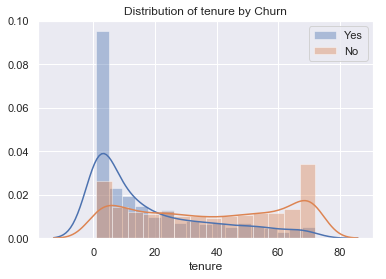

In [255]:
ax1 = sns.distplot(churn_data[churn_data["Churn"] == "Yes"]["tenure"],label = "Yes")
ax2 = sns.distplot(churn_data[churn_data["Churn"] == "No"]["tenure"],label = "No")
plt.title("Distribution of tenure by Churn")
plt.legend()
plt.show()

#### Observation
Those with smaller tenure/recent new customer has a higher churn rate or higher chance of churning. Reasons for that maybe that long term customers may have develop a brand loyalty to the telco and decide to stay with it compared to newer customers that maybe still comparing between telcos.

### 2.2.3.2 Monthly Charges

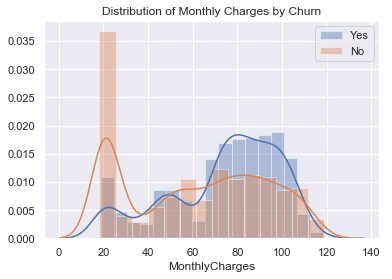

In [256]:
ax1 = sns.distplot(churn_data[churn_data["Churn"] == "Yes"]["MonthlyCharges"],label = "Yes")
ax2 = sns.distplot(churn_data[churn_data["Churn"] == "No"]["MonthlyCharges"],label = "No")
plt.title("Distribution of Monthly Charges by Churn")
plt.legend()
plt.show()

#### Observation
Customers with higher monthly charges have a higher churn rate, this reaffirms the observations before that higher prices lead to higher churn rate and that this two variable, monthly charges and churn rate are positively correlated and should be included during the modelling.

### 2.2.3.3 Total Charges

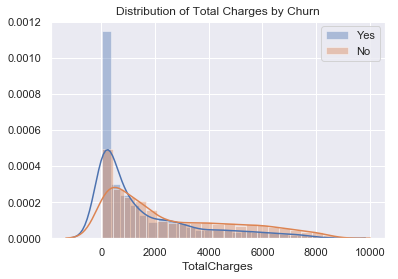

In [257]:
ax1 = sns.distplot(churn_data[churn_data["Churn"] == "Yes"]['TotalCharges'].astype(float),label = "Yes")
ax2 = sns.distplot(churn_data[churn_data["Churn"] == "No"]['TotalCharges'].astype(float),label = "No")
plt.title("Distribution of Total Charges by Churn")
plt.legend()
plt.show()

#### Observation
Distribution of total charges is mostly concentrated to the left below $2000. Surprisely, those with higher total charges have a lower churn rate.

### 2.2.3.4 Correlation between the numerical features

<Figure size 1296x864 with 0 Axes>

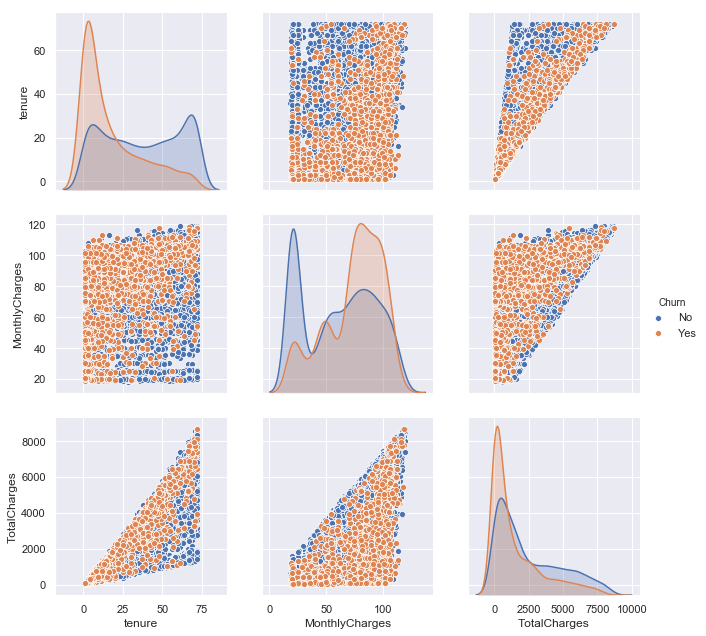

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


In [258]:
plt.figure(figsize=(18,12))
numerical_features = ['tenure','MonthlyCharges','TotalCharges','Churn']
sns.pairplot(churn_data[numerical_features],hue="Churn",height=3)
plt.show()
churn_data[numerical_features].corr()

#### Observation
We can observe a strong correlation between monthly charges and total charges(0.8258) as well as between the tenure and the charges(0.6510).This suggest that we may need to remove total charges in our model later on as it may be redundant.

### 2.2.3.5 Monthly Charges vs Total Charges vs Tenure against Churn
3D graph to visualize relation of this 3 numerical variables.

In [259]:
trace1 = go.Scatter3d(x = churn_data[churn_data["Churn"]=="Yes"]["MonthlyCharges"],
                      y = churn_data[churn_data["Churn"]=="Yes"]["TotalCharges"],
                      z = churn_data[churn_data["Churn"]=="Yes"]["tenure"],
                      name = "Churns",
                      text = "Cus Id: " + churn_data[churn_data["Churn"]=="Yes"]["customerID"],
                      mode = "markers",
                      marker = dict(size = 1,color = "red")
                     )
trace2 = go.Scatter3d(x = churn_data[churn_data["Churn"]=="No"]["MonthlyCharges"],
                      y = churn_data[churn_data["Churn"]=="No"]["TotalCharges"],
                      z = churn_data[churn_data["Churn"]=="No"]["tenure"],
                      name = "Non Churn",
                      text = "Cus Id: " + churn_data[churn_data["Churn"]=="No"]["customerID"],
                      mode = "markers",
                      marker = dict(size = 1,color= "blue")
                     )

layout = dict(
    title = "Monthly charges vs Total charges vs tenure against Churn",
    scene = dict(
        xaxis = dict(title = "Monthly charges",zeroline=True,showbackground=True
                    ,backgroundcolor='rgb(230, 230,230)'),
        yaxis = dict(title = "Total charges",zeroline=True,showbackground=True
                    ,backgroundcolor='rgb(230, 230,230)'),
        zaxis = dict(title = "tenure",zeroline=True,showbackground=True
                    ,backgroundcolor='rgb(230, 230,230)')
    ),height = 800,
)

fig  = go.Figure(data = [trace1,trace2],layout = layout)
py.iplot(fig)

## 3. Data Preprocessing

In this step we shall convert all categorical data into numerical equivalent for modelling.

In [260]:
import copy 

churn_model = copy.deepcopy(churn_data)

#Categorical variables with more than 3 unique data
cat_var3 = []

#Categorical variables with more than 2 unique data
cat_var2 = []

#Continuous Variables
con_var = []

for i in churn_model.columns[1:21]:
    if len(churn_model[i].unique()) >= 3 and type(churn_model[i][0]) == str:
        cat_var3.append(i)
    elif len(churn_model[i].unique()) == 2:
        cat_var2.append(i)
    else:
        con_var.append(i)
        
#Create Dummy variables for Categorical variables with more than 3 unique data
churn_model = pd.get_dummies(data = churn_model,columns = cat_var3)
    
#Transform Categorical binary variables first
le = LabelEncoder()
for i in cat_var2:
    churn_model[i] = le.fit_transform(churn_model[i])
 
 # Standardize features using min-max method
scaler = MinMaxScaler()
churn_model[con_var] = scaler.fit_transform(churn_model[con_var])

### 3.1 HeatMap
We shall plot the heatmap again to observe the correlation between the features after preprocessing the data.

In [261]:
churn_HeatMap2 = copy.deepcopy(churn_model)
churn_HeatMap2 = churn_HeatMap2.drop(['customerID'], axis=1)
cor_matrix = churn_HeatMap2.corr()
cor_array  = np.array(cor_matrix)
cor_var = list(churn_HeatMap2.columns)
data = [go.Heatmap(z=cor_array,x=cor_var,y=cor_var,colorscale='Greys')]
layout = go.Layout(
    title = "Correlation between features",
    autosize=False,
    width=650,
    height=600,
    margin=go.layout.Margin(
        l=200,
        r=0,
        b=200,
        t=30,
        pad=4
    ),
        yaxis = dict(tickfont = dict(size = 10)),
        xaxis = dict(tickfont = dict(size = 10))
)


fig = go.Figure(data,layout)
py.iplot(fig)

## 4. Machine Learning
* 4.1 Feature Selection
* 4.2 Confusion Matrix/Feature Importance Code for evaluating model
* 4.3 Decision Trees
* 4.4 Ensemble Methods
* 4.5 Logistic Regression
* 4.6 KNN Classifier
* 4.7 Support Vector Machine Classifier

In [33]:
# Import libraries
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, make_scorer , recall_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.grid_search import GridSearchCV

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



In [34]:
# For storing the score matrixs of every model built
baseline_model_results = pd.DataFrame()
finetune_model_results = pd.DataFrame()

### 4.1 Feature Selection
We shall implement feature selection using the chi2 scoring function to fit into our model. Feature selection is done to reduce overfitting of model and extracting only the relevant features.

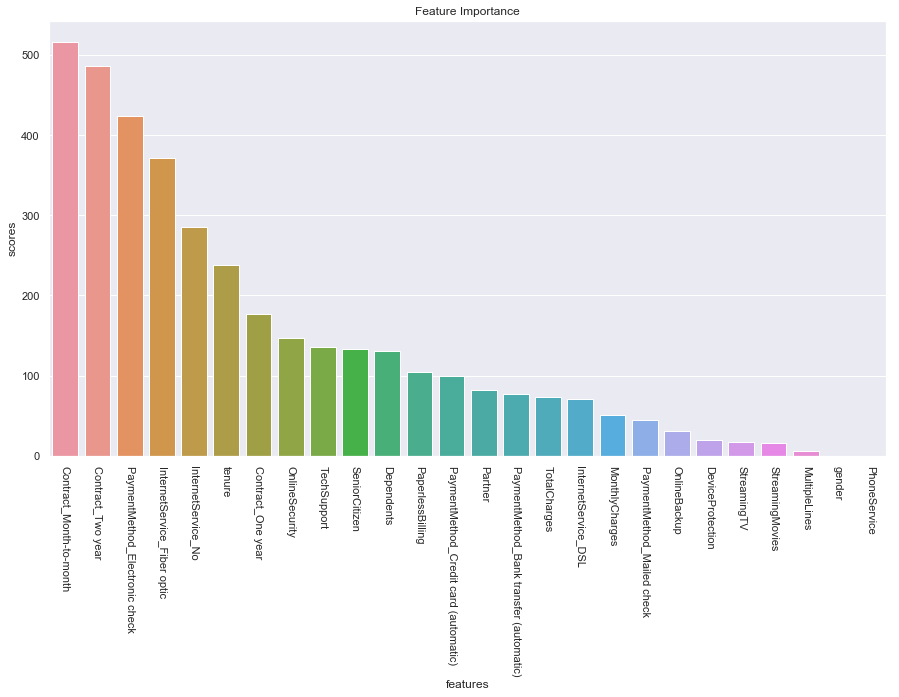

P-value of Insignificant Features
gender : 0.6140655052865054
PhoneService : 0.7604618273699781


,features,scores,p_values,feature_type
19,Contract_Month-to-month,516.714004,2.195119e-114,Categorical
21,Contract_Two year,486.223101,9.454286e-108,Categorical
24,PaymentMethod_Electronic check,424.113152,3.105849e-94,Categorical
17,InternetService_Fiber optic,372.082851,6.587130e-83,Categorical
18,InternetService_No,285.475152,4.814000e-64,Categorical
4,tenure,238.007569,1.069428e-53,Numerical
20,Contract_One year,176.608724,2.666317e-40,Categorical
7,OnlineSecurity,147.165601,7.219883e-34,Categorical
10,TechSupport,135.439602,2.645952e-31,Categorical
1,SeniorCitizen,133.482766,7.089546e-31,Categorical


In [35]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

sns.set(font_scale = 1)

features = list(churn_model.columns)
features.remove("customerID")
features.remove("Churn")

churn_x = churn_model[features]
churn_y = churn_model["Churn"]

#Examine all feature
select = SelectKBest(score_func = chi2,k = 5)
fit    = select.fit(churn_x,churn_y)

#create dataframe
score = pd.DataFrame({"features":features,"scores":fit.scores_,"p_values":fit.pvalues_ })
score = score.sort_values(by = "scores" ,ascending =False)

score["feature_type"] = np.where(score["features"].isin(con_var),"Numerical","Categorical")
plt.figure(figsize=(15,8))
# ax = sns.pointplot(x="features",y = "scores",data = score[score["feature_type"] == "Categorical"])
ax = sns.barplot(x="features",y = "scores",data = score)
plt.title("Feature Importance")
ax.set_xticklabels(ax.get_xticklabels(), rotation=270)
plt.show()

print("P-value of Insignificant Features")
for index,row in score.iterrows():
    if row[2] > 0.05:
        print(row[0],":",row[2])


best_cat_features = []
count = 0;
for index,row in score.iterrows():
    if(count == 4):
        break
    else:
        count+=1
        best_cat_features.append(row[0])
score

#### Observation:
The top four features are `Contract_Month-to-month` , `Contract_Two year`, `PaymentMethod_Electronic check`, `InternetService_Fiber optic`. In addition based on the p-value of the features, `gender`,`phoneservice` and `TotalCharges` are redundant features that could be removed.

### 4.2 Confusion Matrix/Feature Importance Code for evaluating model

In [36]:
def print_confusion_matrix(confusion_matrix, class_names,decision_tree,X_test,y_test):
    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=(12,4))
    plt.subplot(121)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.title('Confusion Matrix',fontsize=15)
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    
    
    plt.subplot(122)
        # Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
    # lr.classes_
    score = decision_tree.predict_proba(X_test)[:, 1]

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.title('Receiver operating characteristic')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return 



In [37]:
def print_features_impt_coef(model, features, model_name):
    if model_name == "SVM":
        coefficients = pd.DataFrame(model.coef_.ravel())
        title_name = "Coefficients"
    
    elif model_name == "Logistic Regression":
        coefficients = pd.DataFrame(model.coef_[0])
        title_name = "Coefficients"
    
    else:
        coefficients  = pd.DataFrame(model.feature_importances_)
        title_name = "Scores"
        
    column_df     = pd.DataFrame(features)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = [title_name,"features"]
    coef_sumry    = coef_sumry.sort_values(by = title_name,ascending = False)
    
    plt.figure(figsize=(13,7))
    ax = sns.barplot(x = coef_sumry["features"],y = coef_sumry[title_name],data = coef_sumry)
    plt.title("Feature Importance")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=270)
    plt.show()

### 4.3 Decision Tree

### 4.3.1 Decision Tree: Baseline Model

We first create a decision tree with all features included and evaluate its accuracy as a baseline.

In [38]:
# # Split dataset for modelling
features = list(churn_model.columns)
features.remove('customerID')
features.remove('Churn')

X = churn_model[features]
y = churn_model["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345,stratify = y)
y_train.value_counts()

0    3614
1    1308
Name: Churn, dtype: int64

In [39]:
Baseline_DecisionTree = DecisionTreeClassifier(criterion='entropy',class_weight = "balanced",random_state=12345)
decision_tree_model = Baseline_DecisionTree.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

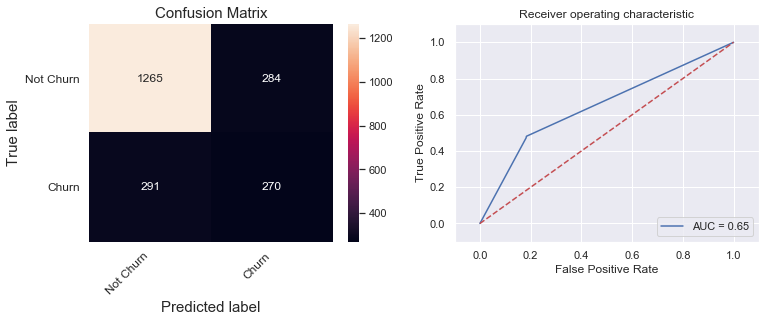

In [40]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print_confusion_matrix([[TN,FP],[FN,TP]], ['Not Churn','Churn'],decision_tree_model,X_test,y_test)

In [41]:
# Performance of baseline decision tree model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Sensitivity: ", recall_score(y_test, y_pred)) 
print("Precision: ", precision_score(y_test, y_pred)) 
print ("f1 Score: ", f1_score(y_test, y_pred))
print("Roc Auc:", roc_auc_score(y_test, y_pred))

Accuracy:  0.7274881516587678
Sensitivity:  0.48128342245989303
Precision:  0.48736462093862815
f1 Score:  0.484304932735426
Roc Auc: 0.6489696647483454


In [42]:
baseline_model_results = baseline_model_results.append(pd.DataFrame({"Model" : ["Decision Tree(With all Features)"],
                   "Accuracy_score"  : [accuracy_score(y_test, y_pred)],
                   "Sensitivity"  : [recall_score(y_test, y_pred)],                        
                   "Precision"       : [precision_score(y_test, y_pred)],
                   "f1_score"        : [f1_score(y_test, y_pred)],
                   "Roc_Auc_score" : [roc_auc_score(y_test, y_pred)]
                  }))

#### Observation:
Accuracy is alright, however the False Negative Rate is pretty high.

### 4.3.2 Decision Tree: Choosing top 6 features(Chi2) 
Using the feature selection based on chi2, we create an improved model that reduces overfitting.

In [43]:
#Selected Features
selected_features = best_cat_features + con_var
selected_features.remove('TotalCharges')
#Total charges is removed as it is highly correlated to tenure and monthly charges.

In [44]:
# # Split dataset for modelling
X = churn_model[selected_features]
y = churn_model["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345,stratify = y)

In [45]:
Improved_DecisionTree = DecisionTreeClassifier(criterion='entropy',class_weight = "balanced",random_state=12345)
Improved_decision_tree_model = Improved_DecisionTree.fit(X_train, y_train)
y_pred = Improved_decision_tree_model.predict(X_test)

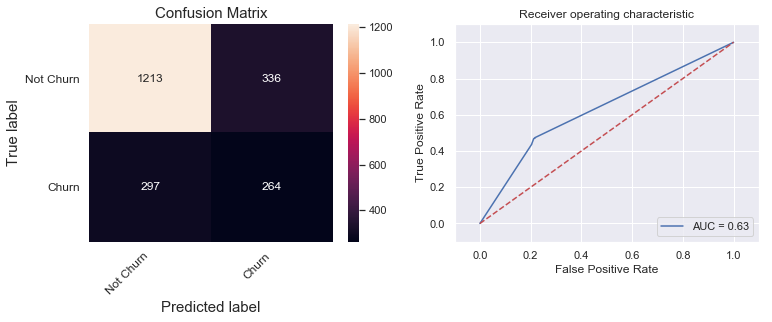

In [46]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

print_confusion_matrix([[TN,FP],[FN,TP]], ['Not Churn','Churn'],Improved_decision_tree_model,X_test,y_test)

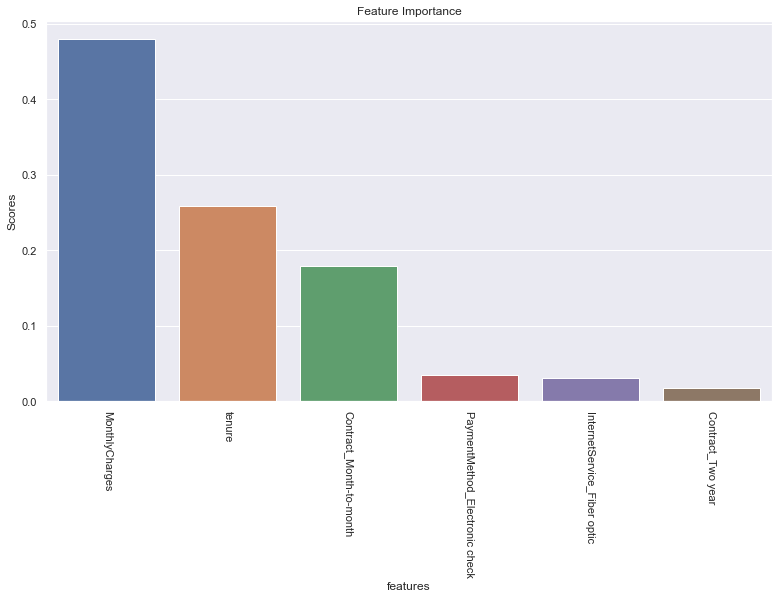

In [47]:
print_features_impt_coef(Improved_decision_tree_model, selected_features, "Decision Tree")

In [48]:
# Performance of improved decision tree model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Sensitivity: ", recall_score(y_test, y_pred)) 
print("Precision: ", precision_score(y_test, y_pred)) 
print ("f1 Score: ", f1_score(y_test, y_pred))
print("Roc Auc:", roc_auc_score(y_test, y_pred))

Accuracy:  0.7
Sensitivity:  0.47058823529411764
Precision:  0.44
f1 Score:  0.4547803617571059
Roc Auc: 0.6268370485702351


#### Observation:
Accuracy and sensitivity decreased, but it is alright as we continue tuning the model. 

### 4.3.2 Decision Tree: Top features and Depth Selection(GridSearchCV)
We then move on to select the best height that maximises accuracy

In [49]:
height_range = np.arange(2,20)
param_grid = dict(max_depth=height_range,criterion=['entropy','gini'])
grid = GridSearchCV(Improved_DecisionTree,param_grid,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=12345, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [50]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7486793986184478
{'criterion': 'entropy', 'max_depth': 5}
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=12345, splitter='best')


In [51]:
BestDecisionTree = DecisionTreeClassifier(criterion='entropy',class_weight = "balanced",max_depth=5,random_state = 12345)
best_decision_tree_model = BestDecisionTree.fit(X_train, y_train)
y_pred = best_decision_tree_model.predict(X_test)

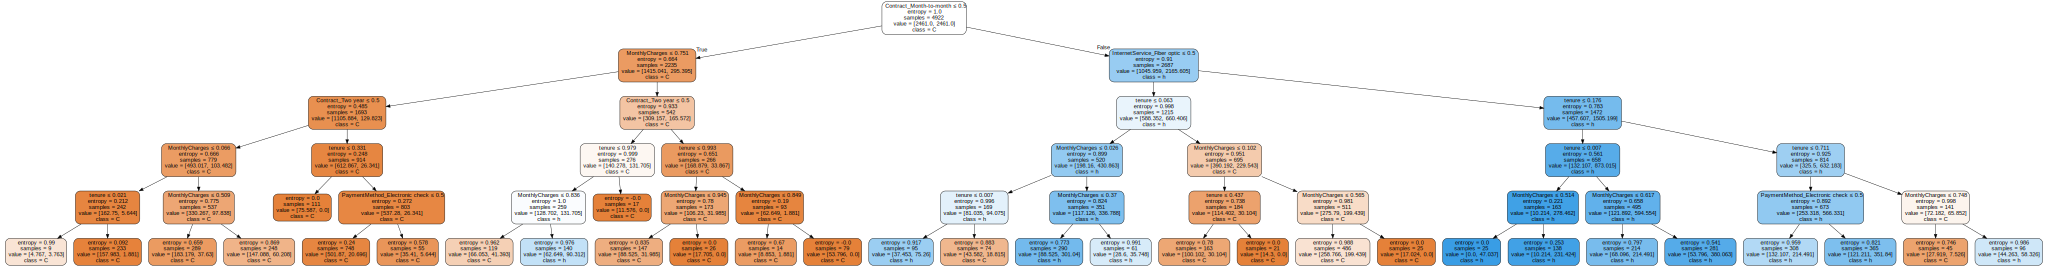

In [52]:
# Plot the decision tree
import graphviz
dot_data = tree.export_graphviz(best_decision_tree_model, out_file=None, feature_names=selected_features, class_names="Churn", 
                                filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

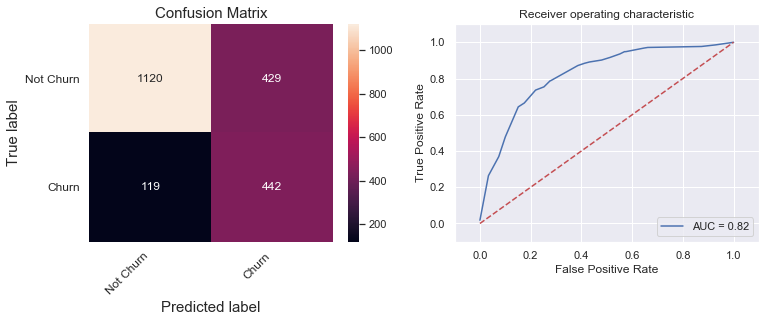

In [53]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

print_confusion_matrix([[TN,FP],[FN,TP]], ['Not Churn','Churn'],best_decision_tree_model,X_test,y_test)

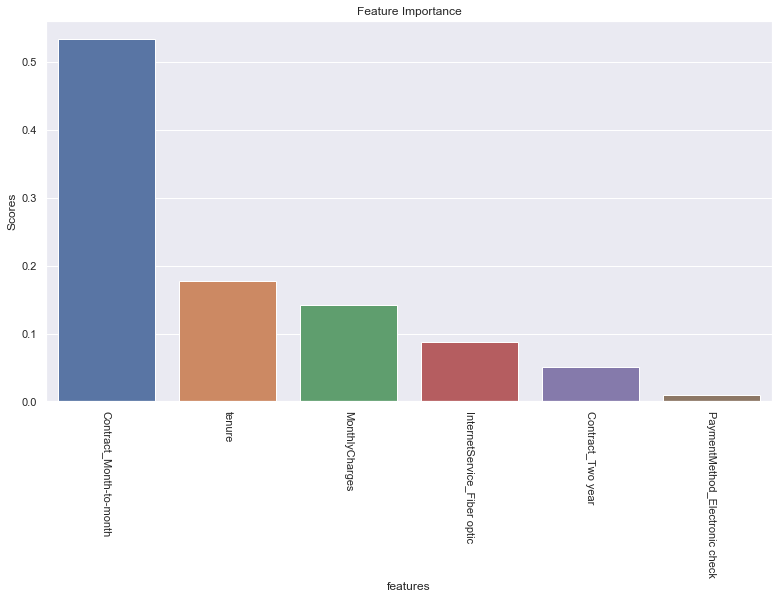

In [54]:
print_features_impt_coef(best_decision_tree_model, selected_features, "Decision Tree")

In [55]:
# Performance of decision tree model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Sensitivity: ", recall_score(y_test, y_pred)) 
print("Precision: ", precision_score(y_test, y_pred)) 
print ("f1 Score: ", f1_score(y_test, y_pred))
print("Roc Auc:", roc_auc_score(y_test, y_pred))

Accuracy:  0.7402843601895734
Sensitivity:  0.7878787878787878
Precision:  0.5074626865671642
f1 Score:  0.61731843575419
Roc Auc: 0.7554629575288065


In [56]:
finetune_model_results = finetune_model_results.append(pd.DataFrame({"Model" : ["Decision Tree(Feature + Depth Selection)"],
                   "Accuracy_score"  : [accuracy_score(y_test, y_pred)],
                   "Sensitivity"  : [recall_score(y_test, y_pred)],                         
                   "Precision"       : [precision_score(y_test, y_pred)],
                   "f1_score"        : [f1_score(y_test, y_pred)],
                   "Roc_Auc_score" : [roc_auc_score(y_test, y_pred)]
                  }))

#### Observation:
With the best depth, we are able to improve accuracy slightly, however the sensitivity increased sharply which is good.

### 4.4 Ensemble Methods
<ol>
    <li>Bootstrap Aggregating (aka.Bagging)</li>
    <li>Random Forest(All features)</li>
    <li>Boosting(All features)</li>    
</ol>

### 4.4.1 Bootstrap Aggregating with SMOTE

We shall utilise the smote algorithm to address the issue of unbalanced data.

In [57]:
#SMOTE
#oversampling minority class using smote
sm = SMOTE(random_state = 12345)
sm_X_train,sm_y_train= sm.fit_sample(X_train,y_train.ravel())

In [58]:
BA = BaggingClassifier(n_estimators=100, random_state=12345)
BA_model = BA.fit(sm_X_train, sm_y_train)
BA_model.classes_

array([0, 1], dtype=int64)

In [59]:
y_pred = BA_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Sensitivity: ", recall_score(y_test, y_pred)) 
print("Precision: ", precision_score(y_test, y_pred)) 
print ("f1 Score: ", f1_score(y_test, y_pred))
print("Roc Auc:", roc_auc_score(y_test, y_pred))

Accuracy:  0.7260663507109004
Sensitivity:  0.5971479500891266
Precision:  0.487627365356623
f1 Score:  0.5368589743589743
Roc Auc: 0.6849522836307478


In [60]:
baseline_model_results = baseline_model_results.append(pd.DataFrame({"Model" : ["Bootstrap Aggregating with SMOTE"],
                   "Accuracy_score"  : [accuracy_score(y_test, y_pred)],
                   "Sensitivity"  : [recall_score(y_test, y_pred)],                        
                   "Precision"       : [precision_score(y_test, y_pred)],
                   "f1_score"        : [f1_score(y_test, y_pred)],
                   "Roc_Auc_score" : [roc_auc_score(y_test, y_pred)]
                  }))

#### Observations:
Both Accuracy and sensitivity is slightly low.

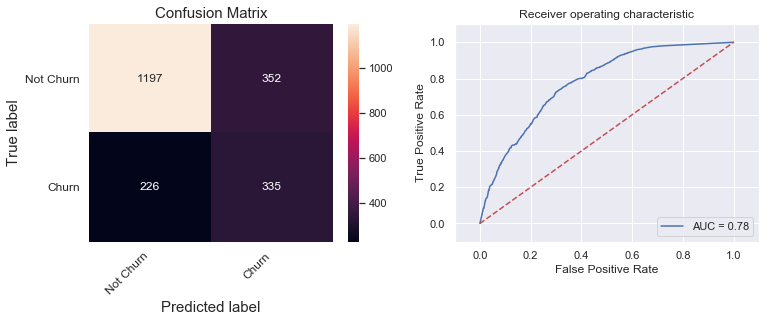

In [61]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

print_confusion_matrix([[TN,FP],[FN,TP]], ['Not Churn','Churn'],BA_model,X_test,y_test)

### 4.4.2 Bootstrap Aggregating with GridSearchCV
We shall now try to tune the Bootstrap model to achieve better results.

In [65]:
GSBA = BaggingClassifier(random_state=12345)

In [66]:
param_grid = {
    'max_features' : [3,6],
    'max_samples' : [0.1, 0.2, 0.5, 1.0],
    'n_estimators': [100,200,300,400]
}

grid = GridSearchCV(GSBA,param_grid,cv=10,verbose=2, n_jobs = -1)

In [67]:
grid.fit(sm_X_train,sm_y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  3.7min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=12345,
         verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [3, 6], 'max_samples': [0.1, 0.2, 0.5, 1.0], 'n_estimators': [100, 200, 300, 400]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [68]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8148865522966242
{'max_features': 3, 'max_samples': 1.0, 'n_estimators': 100}
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=3, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=False, random_state=12345,
         verbose=0, warm_start=False)


In [69]:
ImprovedBA = BaggingClassifier(**grid.best_params_)
ImprovedBA_model = ImprovedBA.fit(sm_X_train,sm_y_train)
ImprovedBA_model.classes_

array([0, 1], dtype=int64)

In [70]:
y_pred = ImprovedBA_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Sensitivity: ", recall_score(y_test, y_pred)) 
print("Precision: ", precision_score(y_test, y_pred)) 
print ("f1 Score: ", f1_score(y_test, y_pred))
print("Roc Auc:", roc_auc_score(y_test, y_pred))

Accuracy:  0.7573459715639811
Sensitivity:  0.6684491978609626
Precision:  0.5349500713266762
f1 Score:  0.5942947702060222
Roc Auc: 0.7289954188142773


#### Observation:
We see both improvements in accuracy and sensitivity after the gridsearch.

In [71]:
finetune_model_results = finetune_model_results.append(pd.DataFrame({"Model" : ["Bootstrap Aggregating(GridSearchCV)"],
                   "Accuracy_score"  : [accuracy_score(y_test, y_pred)],
                   "Sensitivity"  : [recall_score(y_test, y_pred)],                       
                   "Precision"       : [precision_score(y_test, y_pred)],
                   "f1_score"        : [f1_score(y_test, y_pred)],
                   "Roc_Auc_score" : [roc_auc_score(y_test, y_pred)]
                  }))

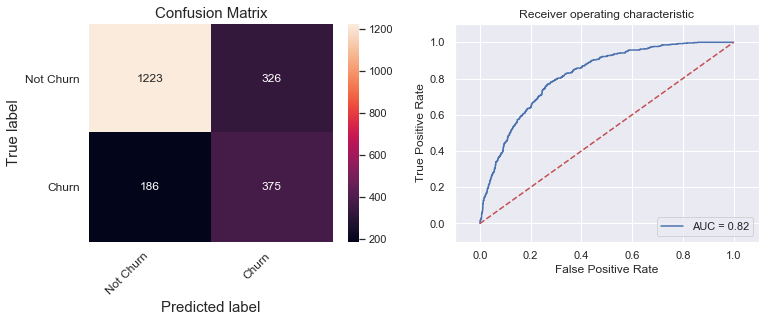

In [72]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

print_confusion_matrix([[TN,FP],[FN,TP]], ['Not Churn','Churn'],ImprovedBA_model,X_test,y_test)

### 4.4.3 Random Forest(All features)

In [73]:
# # Split dataset
# Drop features with p value > 0.05
features = list(churn_model.columns)
features.remove("Churn")
features.remove("customerID")
features.remove("gender")
features.remove("PhoneService")
features.remove("TotalCharges")

X = churn_model[features]
y = churn_model["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345,stratify = y)

In [74]:
# Fit Random Forest Model; Binary Splitting using Entropy
RF = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=12345,class_weight = "balanced")
RF_model = RF.fit(X_train,y_train)
RF_model.classes_

array([0, 1], dtype=int64)

In [75]:
# Validation
y_pred = RF_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Sensitivity: ", recall_score(y_test, y_pred)) 
print("Precision: ", precision_score(y_test, y_pred)) 
print ("f1 Score: ", f1_score(y_test, y_pred))
print("Roc Auc:", roc_auc_score(y_test, y_pred))

Accuracy:  0.7843601895734598
Sensitivity:  0.49732620320855614
Precision:  0.6172566371681416
f1 Score:  0.5508390918065152
Roc Auc: 0.6928206225855563


In [76]:
baseline_model_results = baseline_model_results.append(pd.DataFrame({"Model" : ["Random Forest"],
                   "Accuracy_score"  : [accuracy_score(y_test, y_pred)],
                   "Sensitivity"  : [recall_score(y_test, y_pred)],                     
                   "Precision"       : [precision_score(y_test, y_pred)],
                   "f1_score"        : [f1_score(y_test, y_pred)],
                   "Roc_Auc_score" : [roc_auc_score(y_test, y_pred)]
                  }))

#### Observation:
Accuracy is high however the sensitivity is too low, < 0.5, meaning that the model missed out on almost half of the customers that churn, which makes this model bad even though it has a high accuracy.

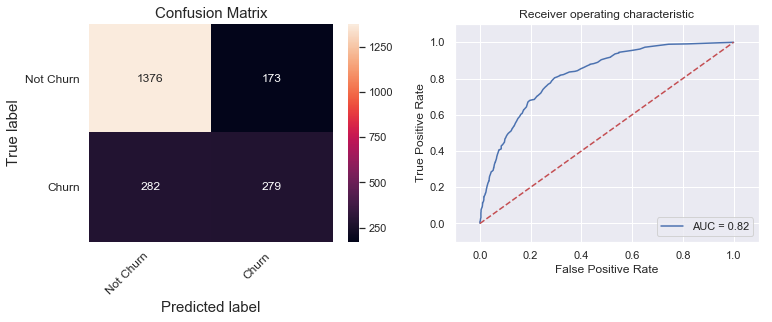

In [77]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

print_confusion_matrix([[TN,FP],[FN,TP]], ['Not Churn','Churn'],RF_model,X_test,y_test)

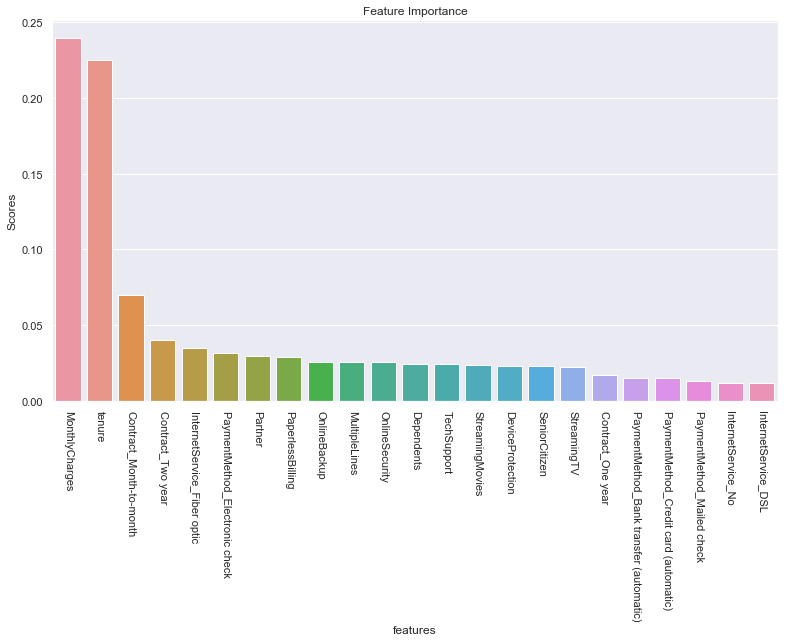

In [78]:
print_features_impt_coef(RF_model, features, "Random Forest")

### 4.4.4 Random Forest with GridSearchCV
We shall tune the model with gridsearch.

In [79]:
GSRF = RandomForestClassifier(class_weight = "balanced", random_state=12345)

In [80]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [70, 80, 100],
    'max_features' : [5, 10, 15],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'n_estimators': [100,200,400],
}

In [81]:
grid = GridSearchCV(GSRF,param_grid,cv=10,verbose=2, n_jobs = -1)

In [82]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 32.5min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=12345,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [70, 80, 100], 'max_features': [5, 10, 15], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200, 400]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [83]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7836245428687525
{'criterion': 'entropy', 'max_depth': 70, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=70, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False,
            random_state=12345, verbose=0, warm_start=False)


In [84]:
bestRF = RandomForestClassifier(**grid.best_params_)
best_RF_model = bestRF.fit(X_train,y_train)
best_RF_model.classes_

array([0, 1], dtype=int64)

In [85]:
y_pred = best_RF_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Sensitivity: ", recall_score(y_test, y_pred)) 
print("Precision: ", precision_score(y_test, y_pred)) 
print ("f1 Score: ", f1_score(y_test, y_pred))
print("Roc Auc:", roc_auc_score(y_test, y_pred))

Accuracy:  0.7881516587677725
Sensitivity:  0.5222816399286988
Precision:  0.6207627118644068
f1 Score:  0.5672797676669895
Roc Auc: 0.7033616075692559


#### Observation:
Accuracy and sensitivity improved slightly, however it is still not a very good model at predicting customer churn.

In [86]:
finetune_model_results = finetune_model_results.append(pd.DataFrame({"Model" : ["Random Forest(GridSearchCV)"],
                   "Accuracy_score"  : [accuracy_score(y_test, y_pred)],
                   "Sensitivity"  : [recall_score(y_test, y_pred)],                     
                   "Precision"       : [precision_score(y_test, y_pred)],
                   "f1_score"        : [f1_score(y_test, y_pred)],
                   "Roc_Auc_score" : [roc_auc_score(y_test, y_pred)]
                  }))

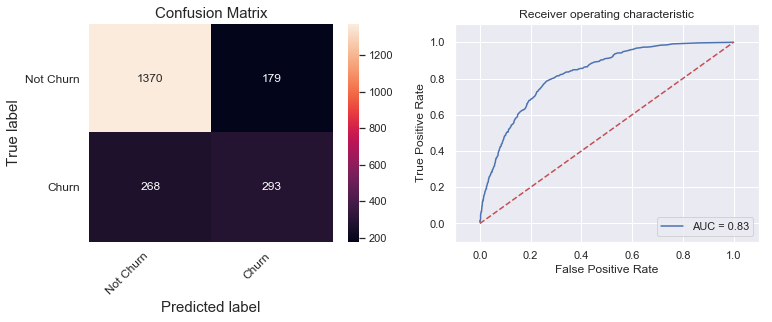

In [87]:
# Performance of Random Forest model
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print_confusion_matrix([[TN,FP],[FN,TP]], ['Not Churn','Churn'],best_RF_model,X_test,y_test)

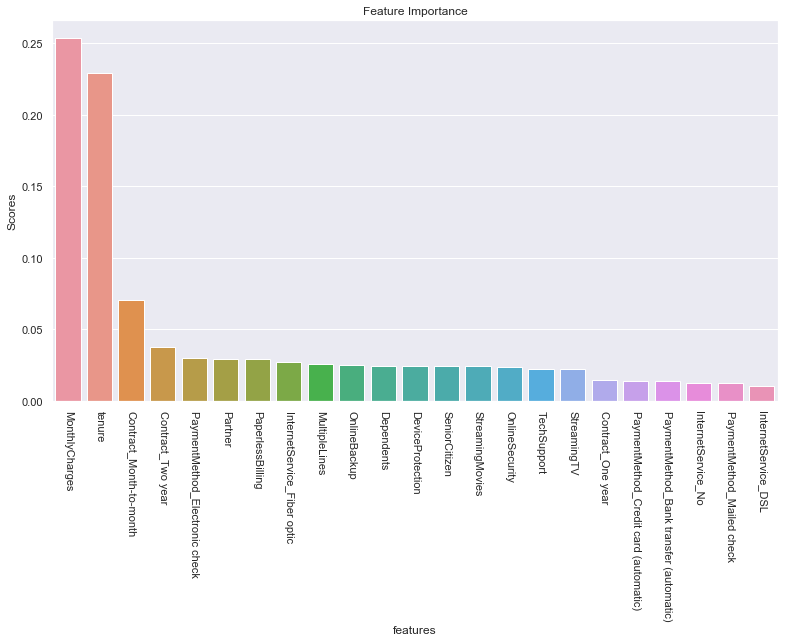

In [88]:
print_features_impt_coef(best_RF_model, features, "Random Forest")

### 4.4.5 AdaBoost with SMOTE

In [89]:
# # Split dataset to do validation
features = list(churn_model.columns)
features.remove("Churn")
features.remove("customerID")
features.remove("gender")
features.remove("PhoneService")
features.remove("TotalCharges")

X = churn_model[features]
y = churn_model["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345,stratify = y)

In [90]:
#SMOTE
#oversampling minority class using smote
sm = SMOTE(random_state = 12345)
sm_X_train,sm_y_train= sm.fit_sample(X_train,y_train.ravel())

In [91]:
# Fit Adaboosting Model
Ada = AdaBoostClassifier(n_estimators=100, random_state=12345)
Ada_model = Ada.fit(sm_X_train,sm_y_train)
Ada_model.classes_

array([0, 1], dtype=int64)

In [92]:
y_pred = Ada_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Sensitivity: ", recall_score(y_test, y_pred)) 
print("Precision: ", precision_score(y_test, y_pred)) 
print ("f1 Score: ", f1_score(y_test, y_pred))
print("Roc Auc:", roc_auc_score(y_test, y_pred))

Accuracy:  0.7734597156398104
Sensitivity:  0.7254901960784313
Precision:  0.5567715458276333
f1 Score:  0.6300309597523219
Roc Auc: 0.7581614957151357


#### Observation:
Accuracy and sensitivity is decently high for this model, we shall attempt to improve this model.

In [93]:
baseline_model_results = baseline_model_results.append(pd.DataFrame({"Model" : ["AdaBoost with SMOTE"],
                   "Accuracy_score"  : [accuracy_score(y_test, y_pred)],
                   "Sensitivity"  : [recall_score(y_test, y_pred)],                            
                   "Precision"       : [precision_score(y_test, y_pred)],
                   "f1_score"        : [f1_score(y_test, y_pred)],
                   "Roc_Auc_score" : [roc_auc_score(y_test, y_pred)]
                  }))

In [94]:
baseline_model_results

,Model,Accuracy_score,Sensitivity,Precision,f1_score,Roc_Auc_score
0,Decision Tree(With all Features),0.727488,0.481283,0.487365,0.484305,0.648970
0,Bootstrap Aggregating with SMOTE,0.726066,0.597148,0.487627,0.536859,0.684952
0,Random Forest,0.784360,0.497326,0.617257,0.550839,0.692821
0,AdaBoost with SMOTE,0.773460,0.725490,0.556772,0.630031,0.758161


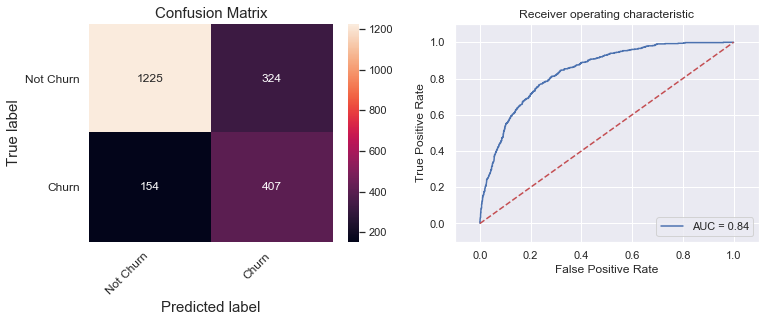

In [95]:
# Performance of Adaboosting model
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print_confusion_matrix([[TN,FP],[FN,TP]], ['Not Churn','Churn'],Ada_model,X_test,y_test)

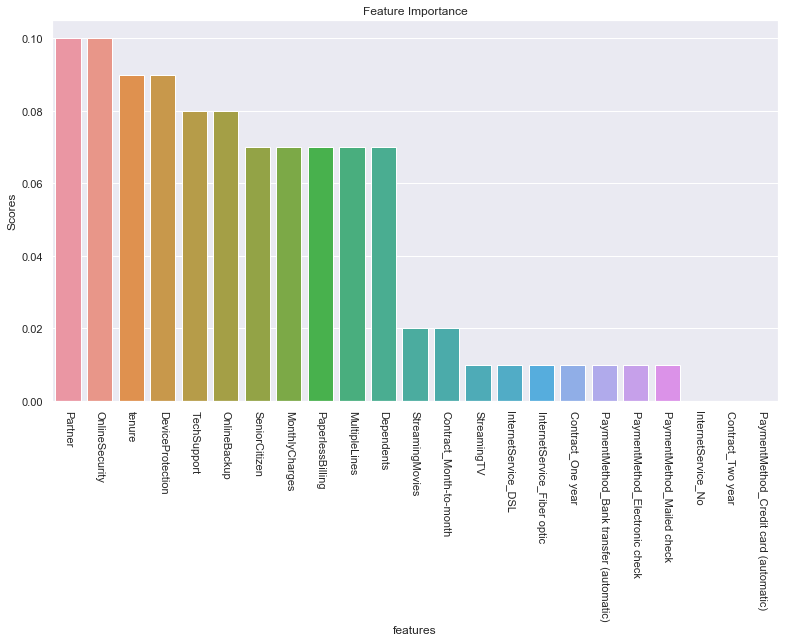

In [96]:
print_features_impt_coef(Ada_model, features, "Ada")

### 4.4.6 AdaBoost with GridSearchCV

In [97]:
GSAda = AdaBoostClassifier(random_state=12345)
param_grid = {
     'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'n_estimators': [300,400,500,600,700],
}
grid = GridSearchCV(GSAda,param_grid,cv=10,scoring="accuracy",verbose=2, n_jobs = -1)

In [98]:
grid.fit(sm_X_train,sm_y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 10.6min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=12345),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'n_estimators': [300, 400, 500, 600, 700]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=2)

In [99]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.843940232429441
{'learning_rate': 0.8, 'n_estimators': 700}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.8, n_estimators=700, random_state=12345)


In [100]:
BestAda = AdaBoostClassifier(**grid.best_params_)
BestAda_model = BestAda.fit(sm_X_train,sm_y_train)
BestAda_model.classes_

array([0, 1], dtype=int64)

In [101]:
y_pred = BestAda_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Sensitivity: ", recall_score(y_test, y_pred)) 
print("Precision: ", precision_score(y_test, y_pred)) 
print ("f1 Score: ", f1_score(y_test, y_pred))
print("Roc Auc:", roc_auc_score(y_test, y_pred))

Accuracy:  0.7838862559241706
Sensitivity:  0.7005347593582888
Precision:  0.5770925110132159
f1 Score:  0.6328502415458938
Roc Auc: 0.7573041776132955


#### Observation:
Accuracy improved with a slight drop of sensitivity.

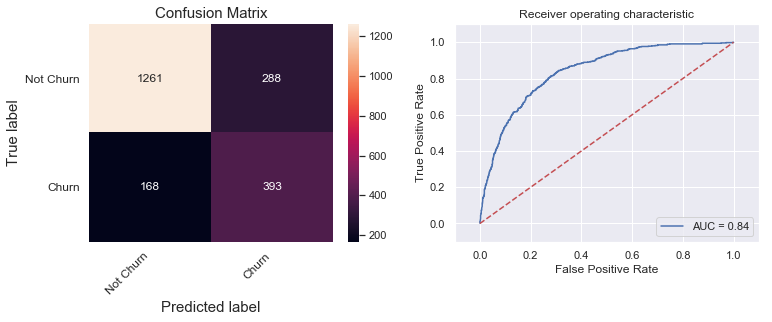

In [102]:
finetune_model_results = finetune_model_results.append(pd.DataFrame({"Model" : ["AdaBoost(GridSearchCV)"],
                   "Accuracy_score"  : [accuracy_score(y_test, y_pred)],
                   "Sensitivity"  : [recall_score(y_test, y_pred)],                        
                   "Precision"       : [precision_score(y_test, y_pred)],
                   "f1_score"        : [f1_score(y_test, y_pred)],
                   "Roc_Auc_score" : [roc_auc_score(y_test, y_pred)]
                  }))
# Performance of Adaboosting model
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print_confusion_matrix([[TN,FP],[FN,TP]], ['Not Churn','Churn'],BestAda_model,X_test,y_test)

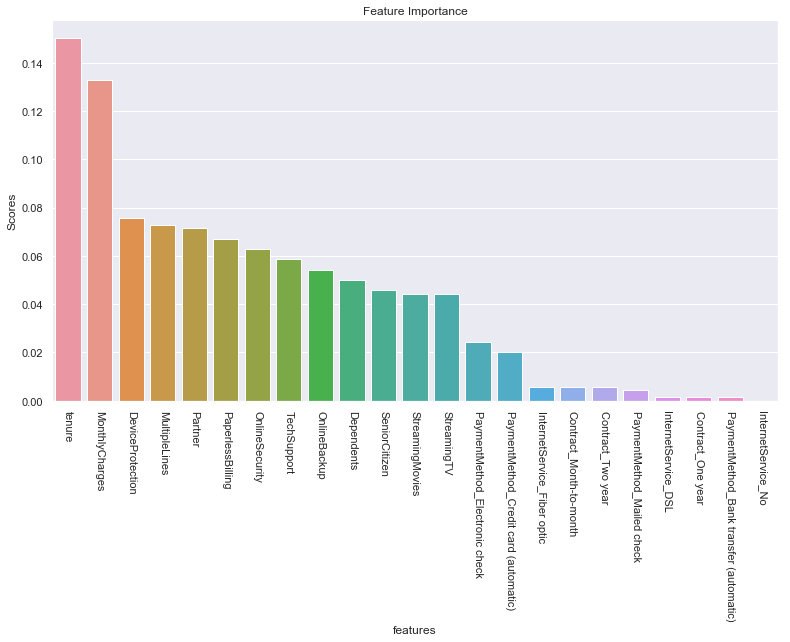

In [103]:
print_features_impt_coef(BestAda_model, features, "Ada")

### 4.5 Logistics Regression

### 4.5.1 Logistics Regression with SMOTE

In [154]:
# # Split dataset to do validation
features = list(churn_model.columns)
features.remove("Churn")
features.remove("customerID")
features.remove("gender")
features.remove("PhoneService")
features.remove("TotalCharges")

X = churn_model[features]
y = churn_model["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345,stratify = y)
X_train.shape

(4922, 23)

In [155]:
#SMOTE
#oversampling minority class using smote
sm = SMOTE(random_state = 12345)
sm_X_train,sm_y_train= sm.fit_sample(X_train,y_train.ravel())

In [156]:
# Model 1: Logistic regression with L2 regularization
model_1 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=12345)
# Model 2: Logistic regression with L1 regularization (Let's use the same parameter values as Model 1, except penalty)
model_2 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l1', C=100, random_state=12345)

In [157]:
Log_model_1 = model_1.fit(sm_X_train,sm_y_train)
Log_model_2 = model_2.fit(sm_X_train,sm_y_train)
y1_pred = Log_model_1.predict(X_test)
y2_pred = Log_model_2.predict(X_test)
print("Accuracy1: ", accuracy_score(y_test, y1_pred))
print("Sensitivity1: ", recall_score(y_test, y1_pred)) 
print("Precision1: ", precision_score(y_test, y1_pred)) 
print ("f1 Score1: ", f1_score(y_test, y1_pred))
print("Roc Auc1:", roc_auc_score(y_test, y1_pred))

Accuracy1:  0.7582938388625592
Sensitivity1:  0.7932263814616756
Precision1:  0.5303933253873659
f1 Score1:  0.6357142857142858
Roc Auc1: 0.7694343656824194


In [158]:
print("Accuracy2: ", accuracy_score(y_test, y2_pred))
print("Sensitivity2: ", recall_score(y_test, y2_pred)) 
print("Precision2: ", precision_score(y_test, y2_pred)) 
print ("f1 Score2: ", f1_score(y_test, y2_pred))
print("Roc Auc2:", roc_auc_score(y_test, y2_pred))

Accuracy2:  0.7582938388625592
Sensitivity2:  0.7932263814616756
Precision2:  0.5303933253873659
f1 Score2:  0.6357142857142858
Roc Auc2: 0.7694343656824194


#### Observation:
Accuracy of both models were the same and even though its accuracy is not the highest, it has the highest sensitivity rate so far.

In [109]:
baseline_model_results = baseline_model_results.append(pd.DataFrame({"Model" : ["Logistic Regression with SMOTE"],
                   "Accuracy_score"  : [accuracy_score(y_test, y1_pred)],
                   "Sensitivity"  : [recall_score(y_test, y1_pred)],
                   "Precision"       : [precision_score(y_test, y1_pred)],
                   "f1_score"        : [f1_score(y_test, y1_pred)],
                   "Roc_Auc_score" : [roc_auc_score(y_test, y1_pred)]
                  }))

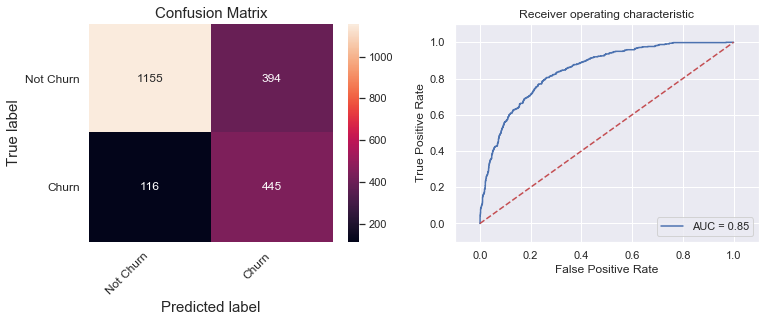

In [110]:
# Performance of model 1 model
cm = confusion_matrix(y_test, y1_pred)
TN, FP, FN, TP = cm.ravel()
print_confusion_matrix([[TN,FP],[FN,TP]], ['Not Churn','Churn'],Log_model_1,X_test,y_test)

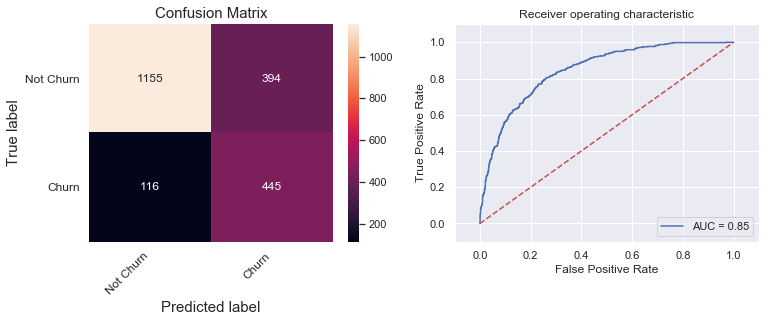

In [111]:
# Performance of model 2 model
cm = confusion_matrix(y_test, y2_pred)
TN, FP, FN, TP = cm.ravel()
print_confusion_matrix([[TN,FP],[FN,TP]], ['Not Churn','Churn'],Log_model_2,X_test,y_test)

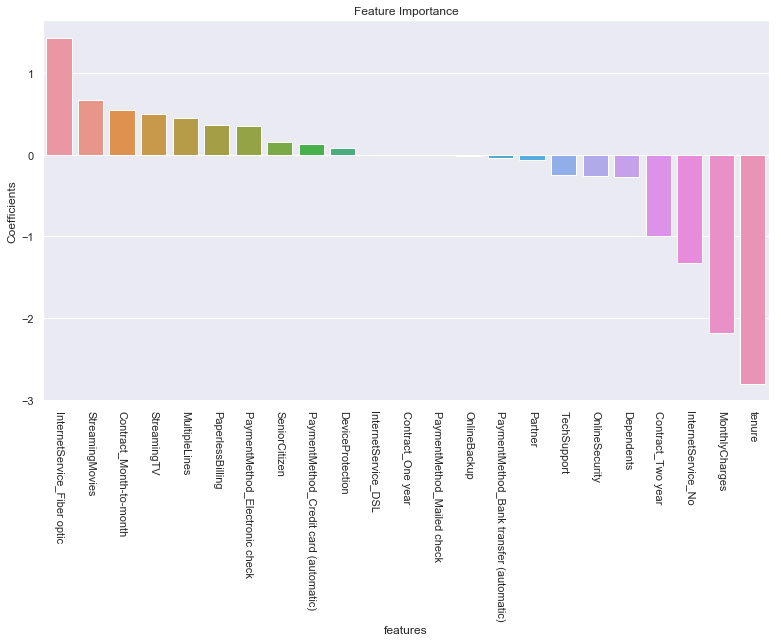

In [112]:
print_features_impt_coef(Log_model_2, features, "Logistic Regression")

### 4.5.2 Logistic Regression with GridSearchCV

In [113]:
GSLog = LogisticRegression(fit_intercept=True,tol=2e-9, random_state=12345)
param_grid = {
     'penalty' : ['l1', 'l2'],
    'max_iter' : [100,200,400,1000],
    'C': np.logspace(0, 4, 10),      
}
grid = GridSearchCV(GSLog,param_grid,cv=10,verbose=2, n_jobs = -1)

In [114]:
grid.fit(sm_X_train,sm_y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 45.0min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12345, solver='liblinear', tol=2e-09,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'max_iter': [100, 200, 400, 1000], 'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [115]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7707526286662977
{'C': 59.94842503189409, 'max_iter': 100, 'penalty': 'l1'}
LogisticRegression(C=59.94842503189409, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=12345,
          solver='liblinear', tol=2e-09, verbose=0, warm_start=False)


In [152]:
BestLog = LogisticRegression(**grid.best_params_)
BestLog_model = BestLog.fit(sm_X_train,sm_y_train)
BestLog_model.classes_

array([0, 1], dtype=int64)

In [153]:
y_pred = BestLog_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Sensitivity: ", recall_score(y_test, y_pred)) 
print("Precision: ", precision_score(y_test, y_pred)) 
print ("f1 Score: ", f1_score(y_test, y_pred))
print("Roc Auc:", roc_auc_score(y_test, y_pred))

Accuracy:  0.7582938388625592
Sensitivity:  0.7932263814616756
Precision:  0.5303933253873659
f1 Score:  0.6357142857142858
Roc Auc: 0.7694343656824194


#### Observation:

There is no improvement to the model from the gridsearch.

In [118]:
finetune_model_results = finetune_model_results.append(pd.DataFrame({"Model" : ["Logistic Regression(GridSearchCV)"],
                   "Accuracy_score"  : [accuracy_score(y_test, y_pred)],
                   "Sensitivity"  : [recall_score(y_test, y_pred)],                          
                   "Precision"       : [precision_score(y_test, y_pred)],
                   "f1_score"        : [f1_score(y_test, y_pred)],
                   "Roc_Auc_score" : [roc_auc_score(y_test, y_pred)]
                  }))

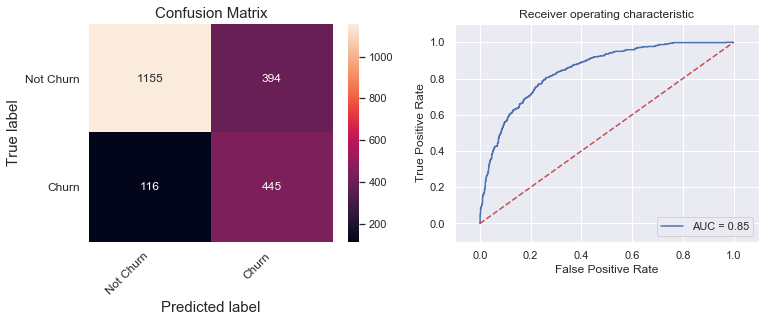

In [119]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print_confusion_matrix([[TN,FP],[FN,TP]], ['Not Churn','Churn'],BestLog_model,X_test,y_test)

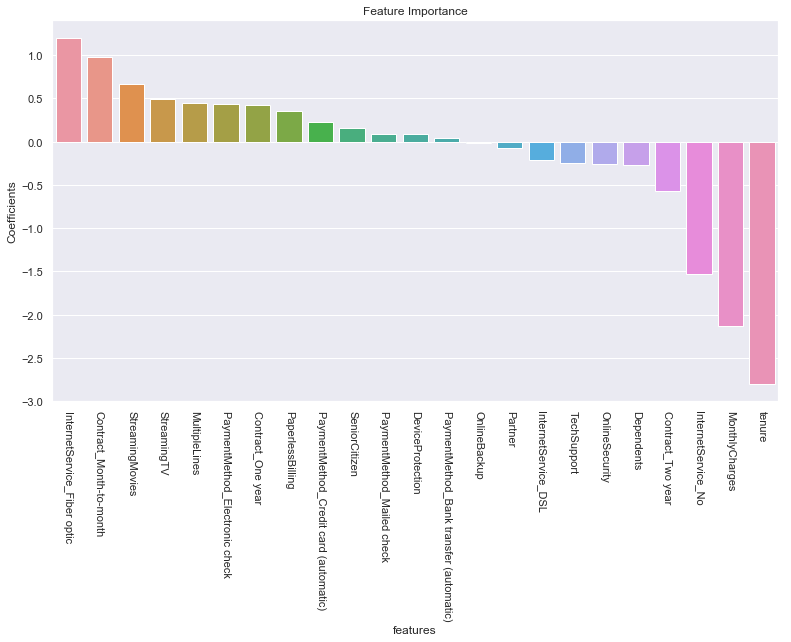

In [120]:
print_features_impt_coef(BestLog_model, features, "Logistic Regression")

### 4.6 KNN Classifier with GridSearchCV

In [121]:
# # Split dataset to do validation
features = list(churn_model.columns)
features.remove("Churn")
features.remove("customerID")
features.remove("gender")
features.remove("PhoneService")
features.remove("TotalCharges")

X = churn_model[features]
y = churn_model["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345,stratify = y)
X_train.shape

(4922, 23)

In [122]:
GSknn = KNeighborsClassifier()
param_grid = {
     'n_neighbors' : list(range(2,11)),
     'weights' : ['uniform','distance'],  
    'leaf_size' : [20,30,40],
    'p': [1,2]
}
grid = GridSearchCV(GSknn,param_grid,cv=10,scoring="accuracy",verbose=2, n_jobs = -1)

In [123]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   46.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'leaf_size': [20, 30, 40], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=2)

In [124]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7771231206826493
{'leaf_size': 20, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')


In [125]:
BestKnn = KNeighborsClassifier(**grid.best_params_)
BestKnn_model = BestKnn.fit(X_train,y_train)
BestKnn_model.classes_

array([0, 1], dtype=int64)

In [126]:
# Get accuracy of KNN model
y_pred = BestKnn_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Sensitivity: ", recall_score(y_test, y_pred)) 
print("Precision: ", precision_score(y_test, y_pred)) 
print ("f1 Score: ", f1_score(y_test, y_pred))
print("Roc Auc:", roc_auc_score(y_test, y_pred))

Accuracy:  0.7838862559241706
Sensitivity:  0.49910873440285203
Precision:  0.6153846153846154
f1 Score:  0.5511811023622047
Roc Auc: 0.6930663103905803


In [127]:
finetune_model_results = finetune_model_results.append(pd.DataFrame({"Model" : ["KNN(GridSearchCV)"],
                   "Accuracy_score"  : [accuracy_score(y_test, y_pred)],
                   "Sensitivity"  : [recall_score(y_test, y_pred)],                           
                   "Precision"       : [precision_score(y_test, y_pred)],
                   "f1_score"        : [f1_score(y_test, y_pred)],
                   "Roc_Auc_score" : [roc_auc_score(y_test, y_pred)]
                  }))

#### Observation:
A very high accuracy rate compared to the other models, however sensitivity is too low.

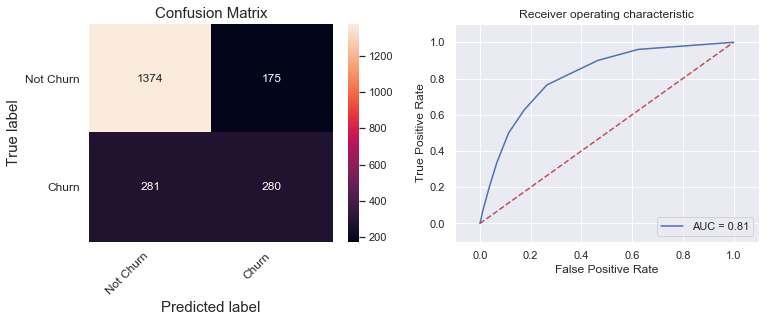

In [128]:
# Performance of KNN model
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print_confusion_matrix([[TN,FP],[FN,TP]], ['Not Churn','Churn'],BestKnn_model,X_test,y_test)

### 4.7 Support Vector Machine

### 4.7.1  Support Vector Machine(Baseline)

In [163]:
# # Split dataset to do validation
features = list(churn_model.columns)
features.remove("Churn")
features.remove("customerID")
features.remove("gender")
features.remove("PhoneService")
features.remove("TotalCharges")

X = churn_model[features]
y = churn_model["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345,stratify = y)

In [160]:
svc = SVC(kernel='linear',gamma = 1.0,probability=True,class_weight = 'balanced',random_state = 12345).fit(X_train, y_train)
svc_model = svc.fit(X_train,y_train)

In [161]:
y_pred = svc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Sensitivity: ", recall_score(y_test, y_pred)) 
print("Precision: ", precision_score(y_test, y_pred)) 
print ("f1 Score: ", f1_score(y_test, y_pred))
print("Roc Auc:", roc_auc_score(y_test, y_pred))

baseline_model_results = baseline_model_results.append(pd.DataFrame({"Model" : ["SVM"],
                   "Accuracy_score"  : [accuracy_score(y_test, y_pred)],
                   "Sensitivity"  : [recall_score(y_test, y_pred)],                         
                   "Precision"       : [precision_score(y_test, y_pred)],
                   "f1_score"        : [f1_score(y_test, y_pred)],
                   "Roc_Auc_score" : [roc_auc_score(y_test, y_pred)]
                  }))

Accuracy:  0.704265402843602
Sensitivity:  0.8538324420677362
Precision:  0.4691478942213516
f1 Score:  0.6055625790139064
Roc Auc: 0.7519646393682774


#### Observation:
Accuracy is low compared to the other models but it has the highest sensitivity among the rest, we shall tune it to increase the sensitivity rate.

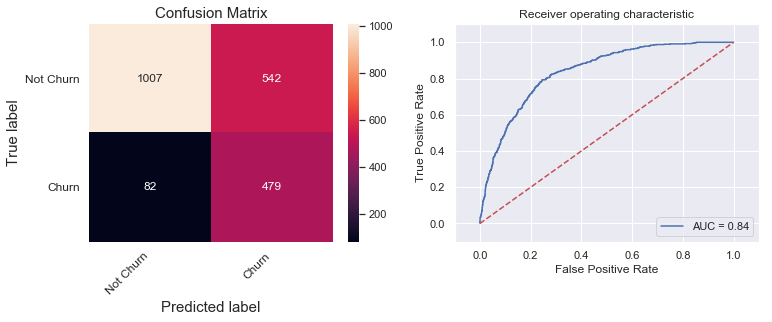

In [132]:
# Performance of SVM model
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print_confusion_matrix([[TN,FP],[FN,TP]], ['Not Churn','Churn'],svc_model,X_test,y_test)

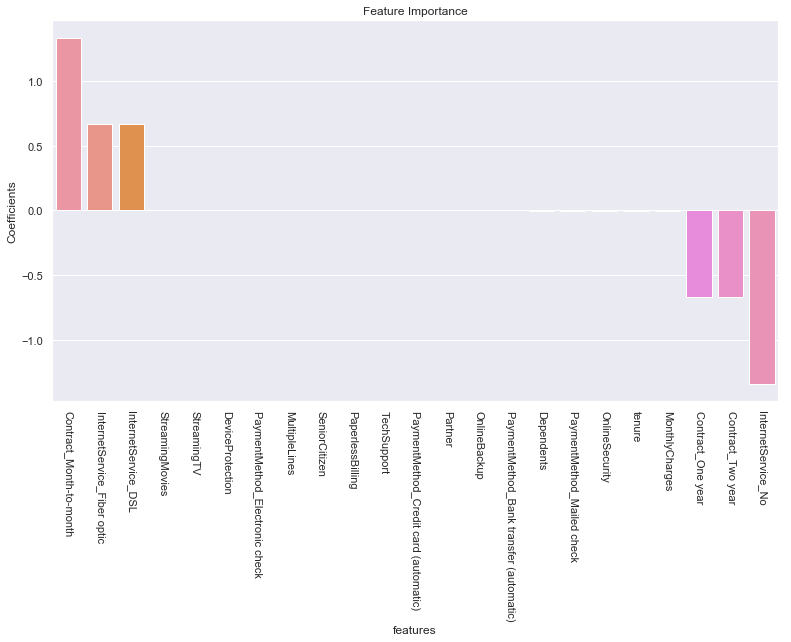

In [133]:
print_features_impt_coef(svc_model, features, "SVM")

### 4.7.2 Support Vector Machine with GridSearch

In [134]:
GSsvc = SVC(probability=True,random_state=12345)
param_grid = {
     'kernel' : ['linear','rbf'],
    'class_weight' : ['balanced'],
    'gamma' : [0.01, 0.1, 1.0],
    'C': [0.1, 1, 10]
}
grid = GridSearchCV(GSsvc,param_grid,cv=10,scoring="recall",verbose=2, n_jobs = -1)

In [135]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.0min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=12345, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'kernel': ['linear', 'rbf'], 'class_weight': ['balanced'], 'gamma': [0.01, 0.1, 1.0], 'C': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=2)

In [136]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8730737735329986
{'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=0.1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=12345, shrinking=True,
  tol=0.001, verbose=False)


In [137]:
Bestsvc = SVC(C=0.1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=12345, shrinking=True,
  tol=0.001, verbose=False)
Bestsvc_model = Bestsvc.fit(X_train,y_train)
Bestsvc_model.classes_

array([0, 1], dtype=int64)

In [138]:
y_pred = Bestsvc_model.predict(X_test)

In [139]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Sensitivity: ", recall_score(y_test, y_pred)) 
print("Precision: ", precision_score(y_test, y_pred)) 
print ("f1 Score: ", f1_score(y_test, y_pred))
print("Roc Auc:", roc_auc_score(y_test, y_pred))

Accuracy:  0.6639810426540285
Sensitivity:  0.8894830659536542
Precision:  0.4354275741710297
f1 Score:  0.5846514352665495
Roc Auc: 0.7358971172247291


#### Observation:
The sensitivty is at the highest at the expense of the accuracy which dropped by 0.04.

In [140]:
finetune_model_results = finetune_model_results.append(pd.DataFrame({"Model" : ["SVM(GridSearchCV)"],
                   "Accuracy_score"  : [accuracy_score(y_test, y_pred)],
                   "Sensitivity"  : [recall_score(y_test, y_pred)],                          
                   "Precision"       : [precision_score(y_test, y_pred)],
                   "f1_score"        : [f1_score(y_test, y_pred)],
                   "Roc_Auc_score" : [roc_auc_score(y_test, y_pred)]
                  }))

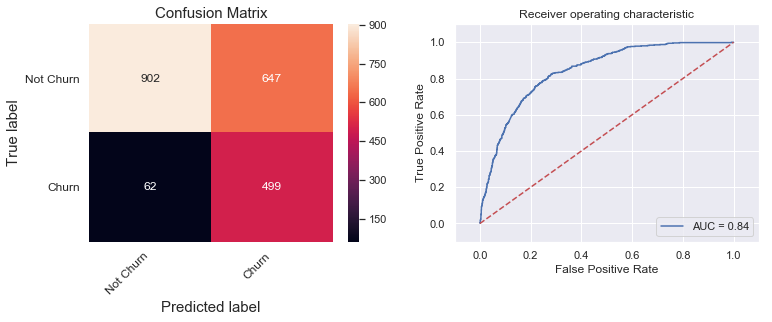

In [141]:
# Performance of SVM model
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print_confusion_matrix([[TN,FP],[FN,TP]], ['Not Churn','Churn'],Bestsvc_model,X_test,y_test)

#### Observation:

A low false negative rate is acheived at the expense of accuracy and the false positive rate.

### 5. Evaluation of Models

### 5.1 Baseline Accuracy by Majority Voting
We assign No churn to all customers since its the majority and get an overall base line accuracy.

In [142]:
result = churn_model["Churn"].value_counts()
result.max()/churn_model.size
print('Baseline Accuracy:',result.max()/churn_model["Churn"].size)

Baseline Accuracy: 0.7342150170648464


### 5.2 Visualzation of Baseline models

In [143]:
baseline_model_results.reset_index(drop=True)

,Model,Accuracy_score,Sensitivity,Precision,f1_score,Roc_Auc_score
0,Decision Tree(With all Features),0.727488,0.481283,0.487365,0.484305,0.648970
1,Bootstrap Aggregating with SMOTE,0.726066,0.597148,0.487627,0.536859,0.684952
2,Random Forest,0.784360,0.497326,0.617257,0.550839,0.692821
3,AdaBoost with SMOTE,0.773460,0.725490,0.556772,0.630031,0.758161
4,Logistic Regression with SMOTE,0.758294,0.793226,0.530393,0.635714,0.769434
5,SVM,0.704265,0.853832,0.469148,0.605563,0.751965


In [144]:
baseline_model_visual = copy.deepcopy(baseline_model_results)

In [145]:
baseline_visual = pd.melt(baseline_model_visual,id_vars="Model", var_name="Metrics", value_name="Score")

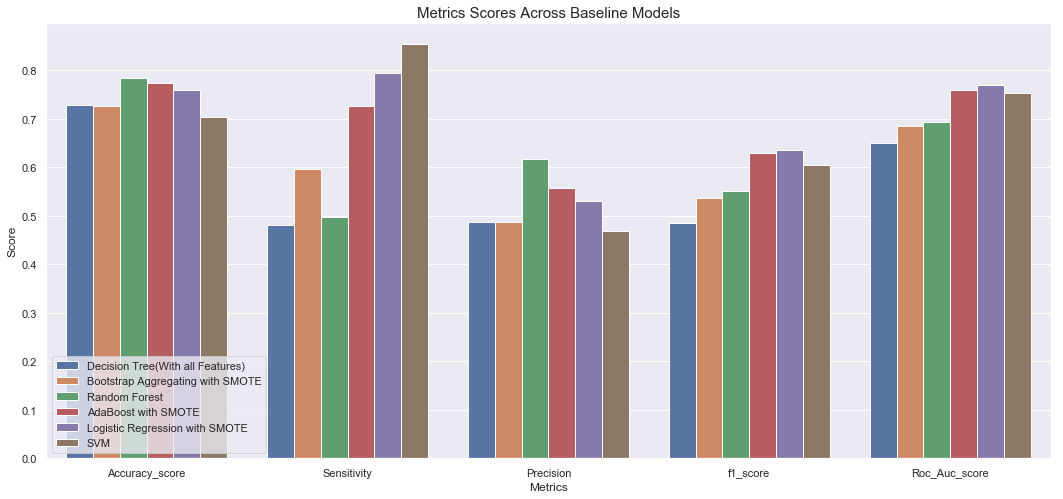

In [146]:
plt.figure(figsize=(18,8))
ax = sns.barplot(x='Metrics', y='Score',hue="Model", data=baseline_visual)
plt.title("Metrics Scores Across Baseline Models",fontsize=15)
plt.legend(loc='lower left')
plt.show()

### 5.3 Visualization of Fine-Tuned Models

In [147]:
finetune_model_results.reset_index(drop=True)

,Model,Accuracy_score,Sensitivity,Precision,f1_score,Roc_Auc_score
0,Decision Tree(Feature + Depth Selection),0.740284,0.787879,0.507463,0.617318,0.755463
1,Bootstrap Aggregating(GridSearchCV),0.757346,0.668449,0.534950,0.594295,0.728995
2,Random Forest(GridSearchCV),0.788152,0.522282,0.620763,0.567280,0.703362
3,AdaBoost(GridSearchCV),0.783886,0.700535,0.577093,0.632850,0.757304
4,Logistic Regression(GridSearchCV),0.758294,0.793226,0.530393,0.635714,0.769434
5,KNN(GridSearchCV),0.783886,0.499109,0.615385,0.551181,0.693066
6,SVM(GridSearchCV),0.663981,0.889483,0.435428,0.584651,0.735897


In [148]:
finetune_model_visual = copy.deepcopy(finetune_model_results)
finetune_visual = pd.melt(finetune_model_visual,id_vars="Model", var_name="Metrics", value_name="Score")

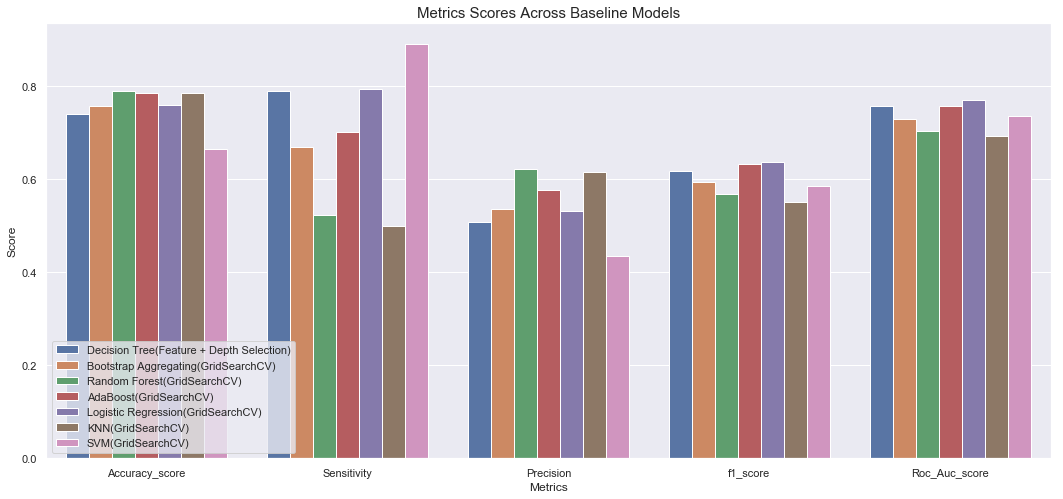

In [149]:
plt.figure(figsize=(18,8))
ax = sns.barplot(x='Metrics', y='Score',hue="Model", data=finetune_visual)
plt.title("Metrics Scores Across Baseline Models",fontsize=15)
plt.legend(loc='lower left')
plt.show()

#### Final Evaluation:

Depending on what the telco company wants, an accurate model or a model with high sensitivity, I will recommend different models.

In terms of the best accuracy, the Random Forest model has the highest accuracy at 0.788. However, it has a relatively low sensitivity 0.52 compared to the other models. While it is generally very accurate, it failed to predict a lot of customers that churn.

In terms of the best sensitivity, support vector machine has the highest sensitivity at 0.89. However, this is at the expense of accuracy as its accuracy is 0.66 which is much lower compared to the other models and even falling below the baseline accuracy of 0.732.

For a model that performs relatively well in both metrics, I will recommend Adaboost which has accuracy of 0.784 and sensitivity of 0.70 or Logistic Regression which has accuracy of 0.758 and sensitivity of 0.79.